## Name- Ranjan Pratap Singh                                                      DS2307

# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


### Importing the libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Importing Dataset[both train and test]

In [128]:
dftrain = pd.read_csv(r"C:\Users\RANJAN\Downloads\termdeposit_train.csv")
dftest = pd.read_csv(r"C:\Users\RANJAN\Downloads\termdeposit_test.csv")

### Exploratory Data Analysis(EDA)  ----->

In [3]:
dftrain

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
dftest

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


###### our both dataset is  of bank prediciton  project , the shape of train dataset is 31647 rows and 18 columns , while test dataset has 13564rows and 17 columns. ( i.e. test datset dont have target varibale ). Our target variable  i.e. subscribed contains contains no and yes ( i.e. if the customer subscribed to the term deposit or not) . it is categorical variable , so we have classification problem so we will use classification model to train , test and predict the data.  

-- checking for duplicated values

In [5]:
dftrain.duplicated().sum()

0

In [6]:
dftest.duplicated().sum()

0

we can see that there is no duplicate valeus in both the dataset

In [8]:
dftrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


#### Here we observe our datatypes . 
We observe that  our datasets contain dtype -  object and int64
#### We can see that there is no null values but to check it further  the possibility of white sapces  .

In [10]:

for i in dftrain.columns:
    print(dftrain[i].value_counts())


26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

In [11]:

for i in dftest.columns:
    print(dftest[i].value_counts())


38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
no     13334
yes      230
Name: default, dtype: int64
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Len

here we can see that there are no null values in both the datasets.

In [6]:
dftrain.describe() 

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In description of train dataset we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see that age,day have almost same so these features are normally distributed and  in features - balance, duration campaign,pdays,previous mean > median therefore they are positevely skewed.

if we see for outliers we can observe that balance, duration campaign,pdays,previous may contain outliers  that we will check  later in this model

In [4]:
dftest.describe() 

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In description of test dataset we have count,mean, standard deviation(STD) , minimum(min), 25%,50%(median),75%,maximum(max)

as we can see that there is no negative value so our description of dataset is valid 

number of observations are same in all columns so there is no missing values

if we compare mean with median i.e. 50% we can see that age,day have almost same so these features are normally distributed and  in features - balance, duration campaign,pdays,previous mean > median therefore they are positevely skewed.

if we see for outliers we can observe that balance, duration campaign,pdays,previous may contain outliers  that we will check  later in this model

### Data Visualization --->

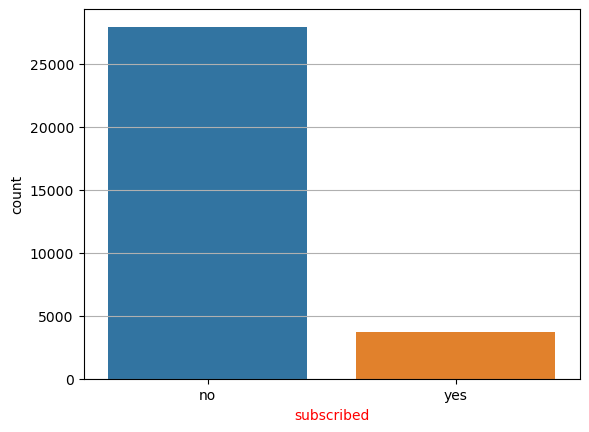

no     27932
yes     3715
Name: subscribed, dtype: int64

In [13]:
sns.countplot(x='subscribed' , data = dftrain )
plt.xlabel('subscribed',color = 'r')
plt.grid(axis ='y')
plt.show()
dftrain['subscribed'].value_counts()



here we can see that in our  train dataset, no. of people subscribed  are very less compared to who subscribed

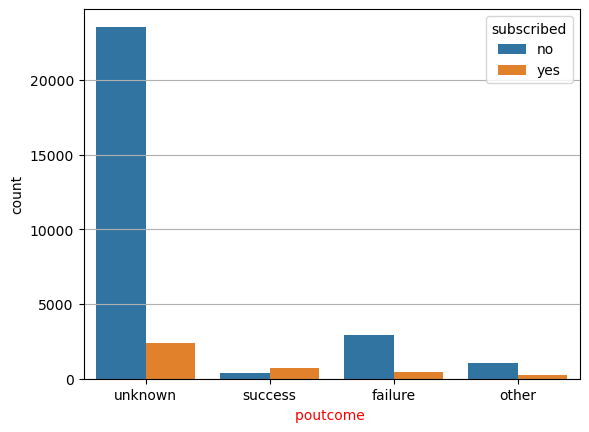

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [14]:
sns.countplot(x='poutcome' , hue = 'subscribed', data = dftrain )
plt.xlabel('poutcome ',color = 'r')
plt.grid(axis ='y')
plt.show()
dftrain['poutcome'].value_counts()




here we can observe that in our train dataset,  most of the outcomes of the previous marketing campaign is mostly unknown and in all the outcome very less people subscribed 


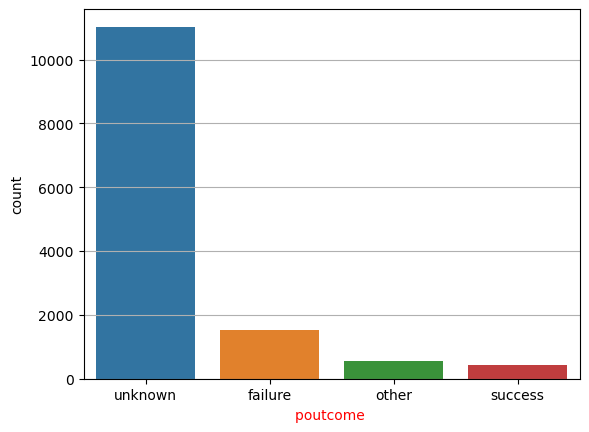

unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64

In [15]:
sns.countplot(x='poutcome' , data = dftest  )
plt.xlabel('poutcome ',color = 'r')
plt.grid(axis ='y')
plt.show()
dftest['poutcome'].value_counts()

here we can observe that in our test dataset too , most of the  outcomes of the previous marketing campaign is mostly unknown 

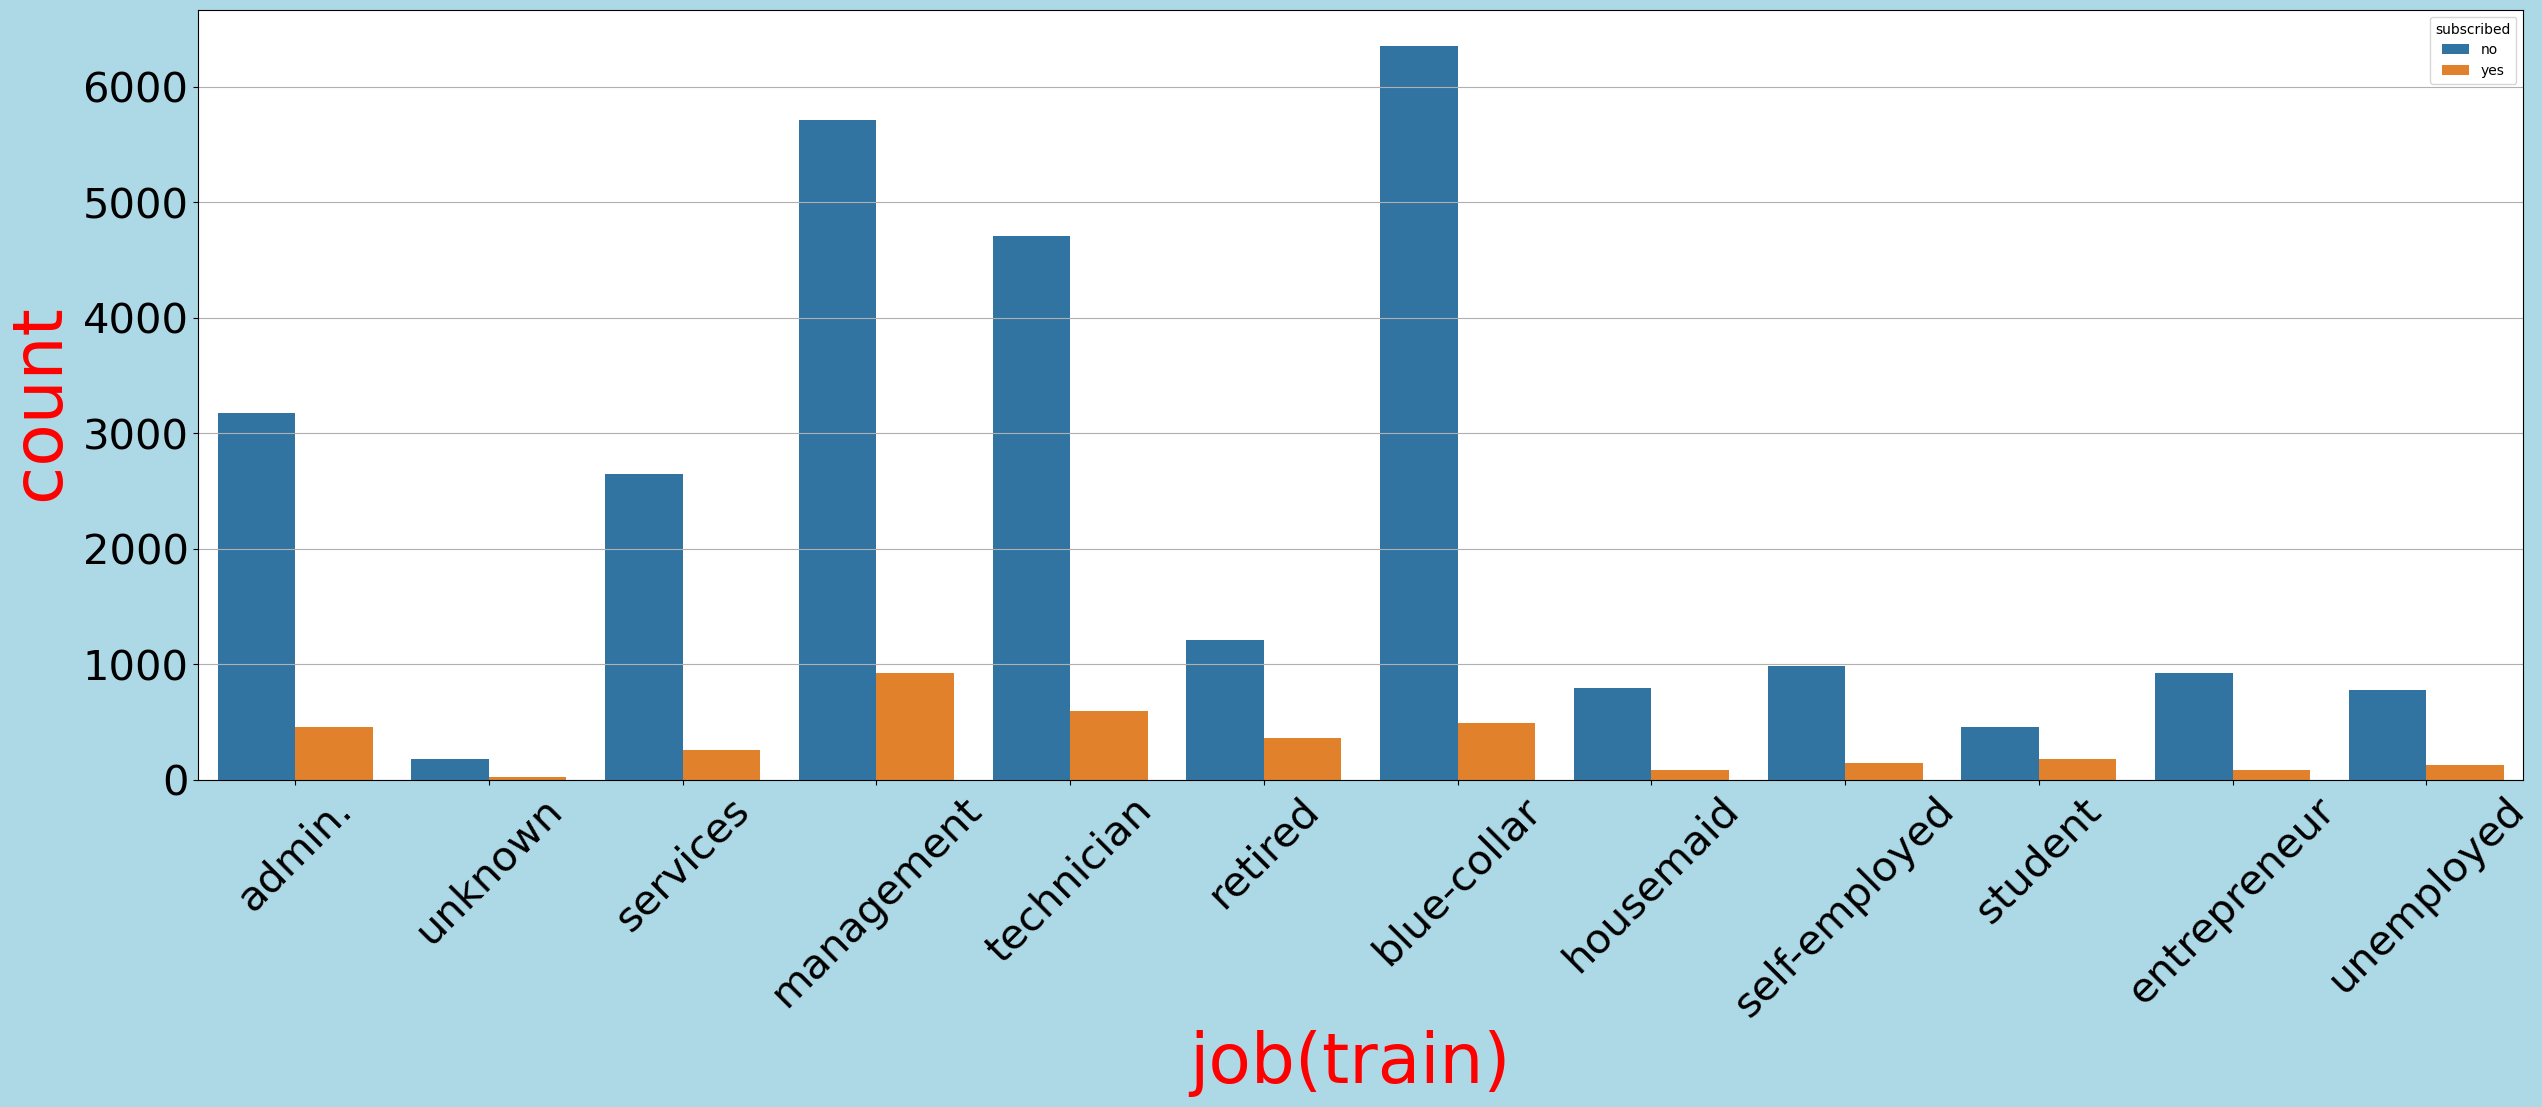

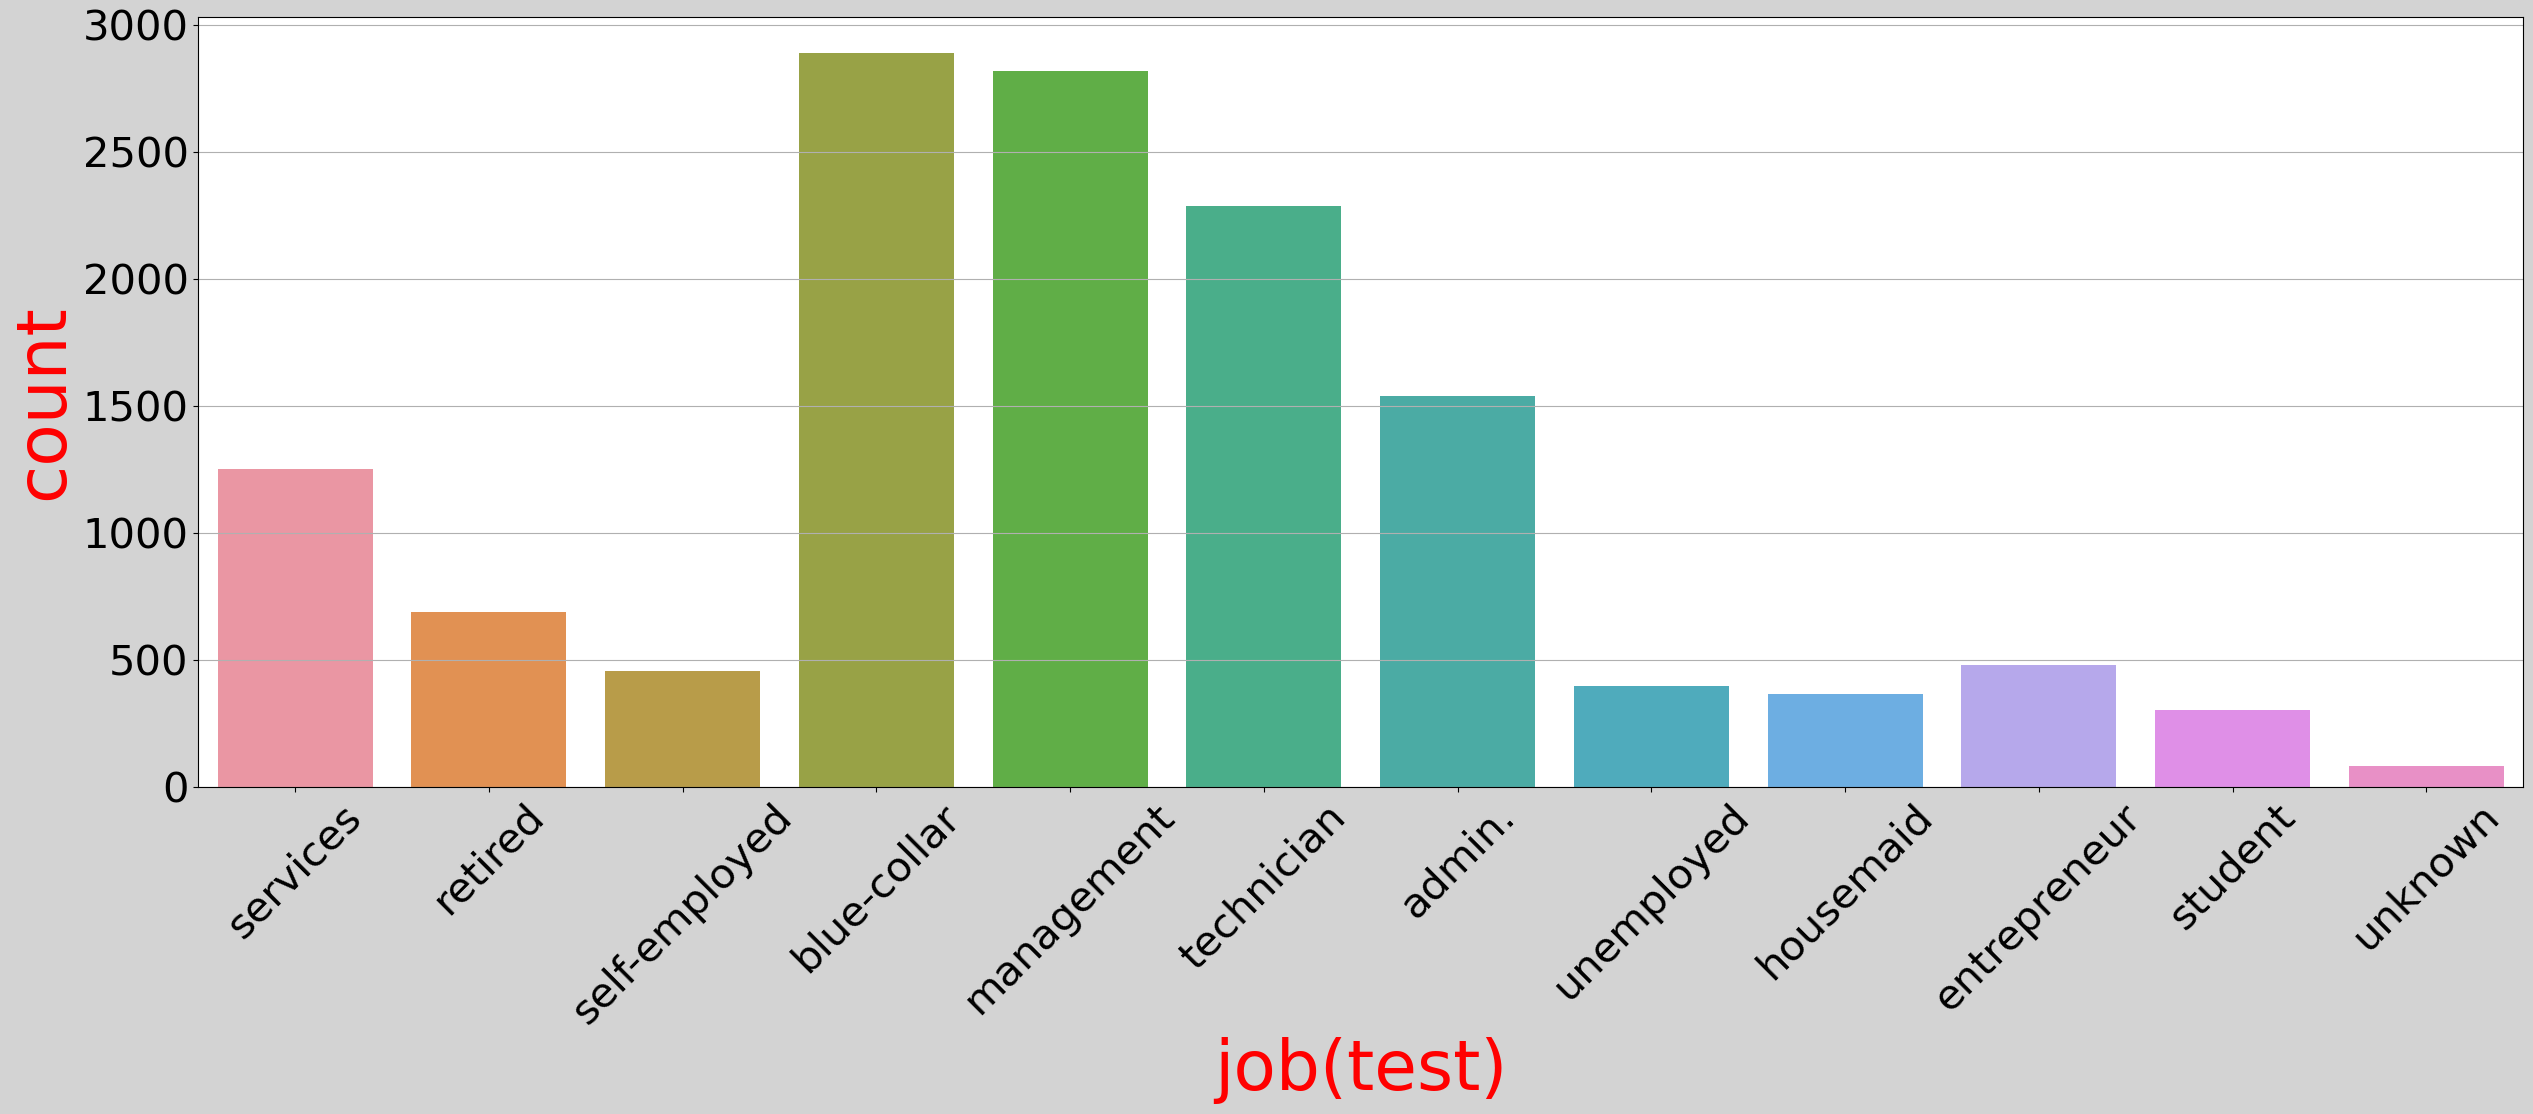

data for trained dataset 
  blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 
---------
 data for test dataset 
  blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


In [17]:
plt.figure(figsize=(30, 10), facecolor="lightblue")
sns.countplot(x='job' , data = dftrain, hue = 'subscribed' )
plt.xlabel('job(train) ',color = 'r', fontsize= 50)
plt.ylabel('count ',color = 'r', fontsize=50)
plt.grid(axis ='y')
plt.xticks(fontsize=30)
plt.xticks(rotation=45)
plt.yticks(fontsize=30)
plt.show()
plt.figure(figsize=(30, 10), facecolor="lightgrey")
sns.countplot(x='job', data=dftest)
plt.xlabel('job(test)', color='r', fontsize=50)
plt.ylabel('count', color='r', fontsize=50)
plt.grid(axis='y')
plt.xticks(fontsize=30)
plt.xticks(rotation=45)
plt.yticks(fontsize=30)
plt.show()
print('data for trained dataset \n ', dftrain['job'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['job'].value_counts())



----- here we can observe that in train datset most of people have management,technician, blue collar jobs and maximum management people subscribed to the term deposit compared to others.

-------here we can observe that in test datset most of people have management,technician, blue collar jobs.

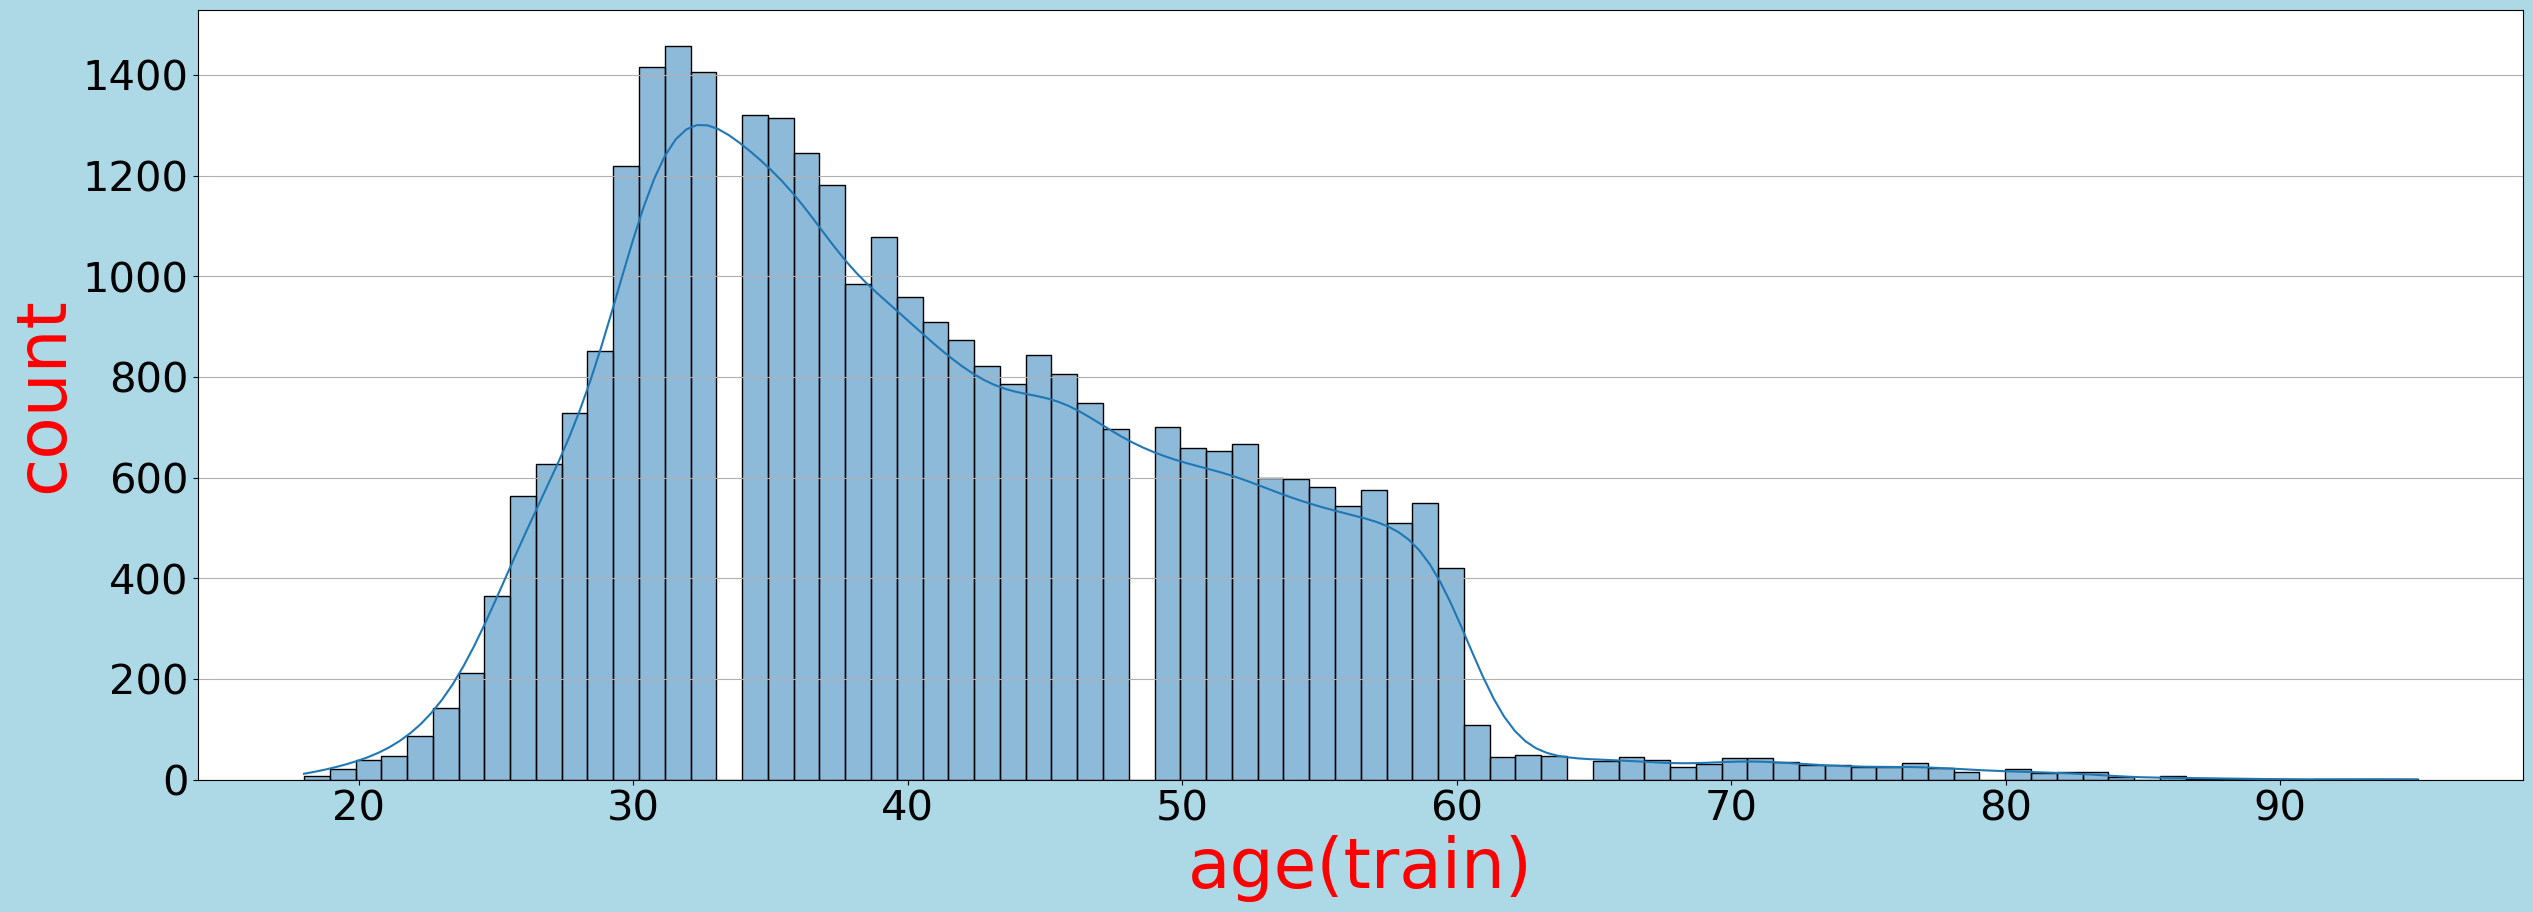

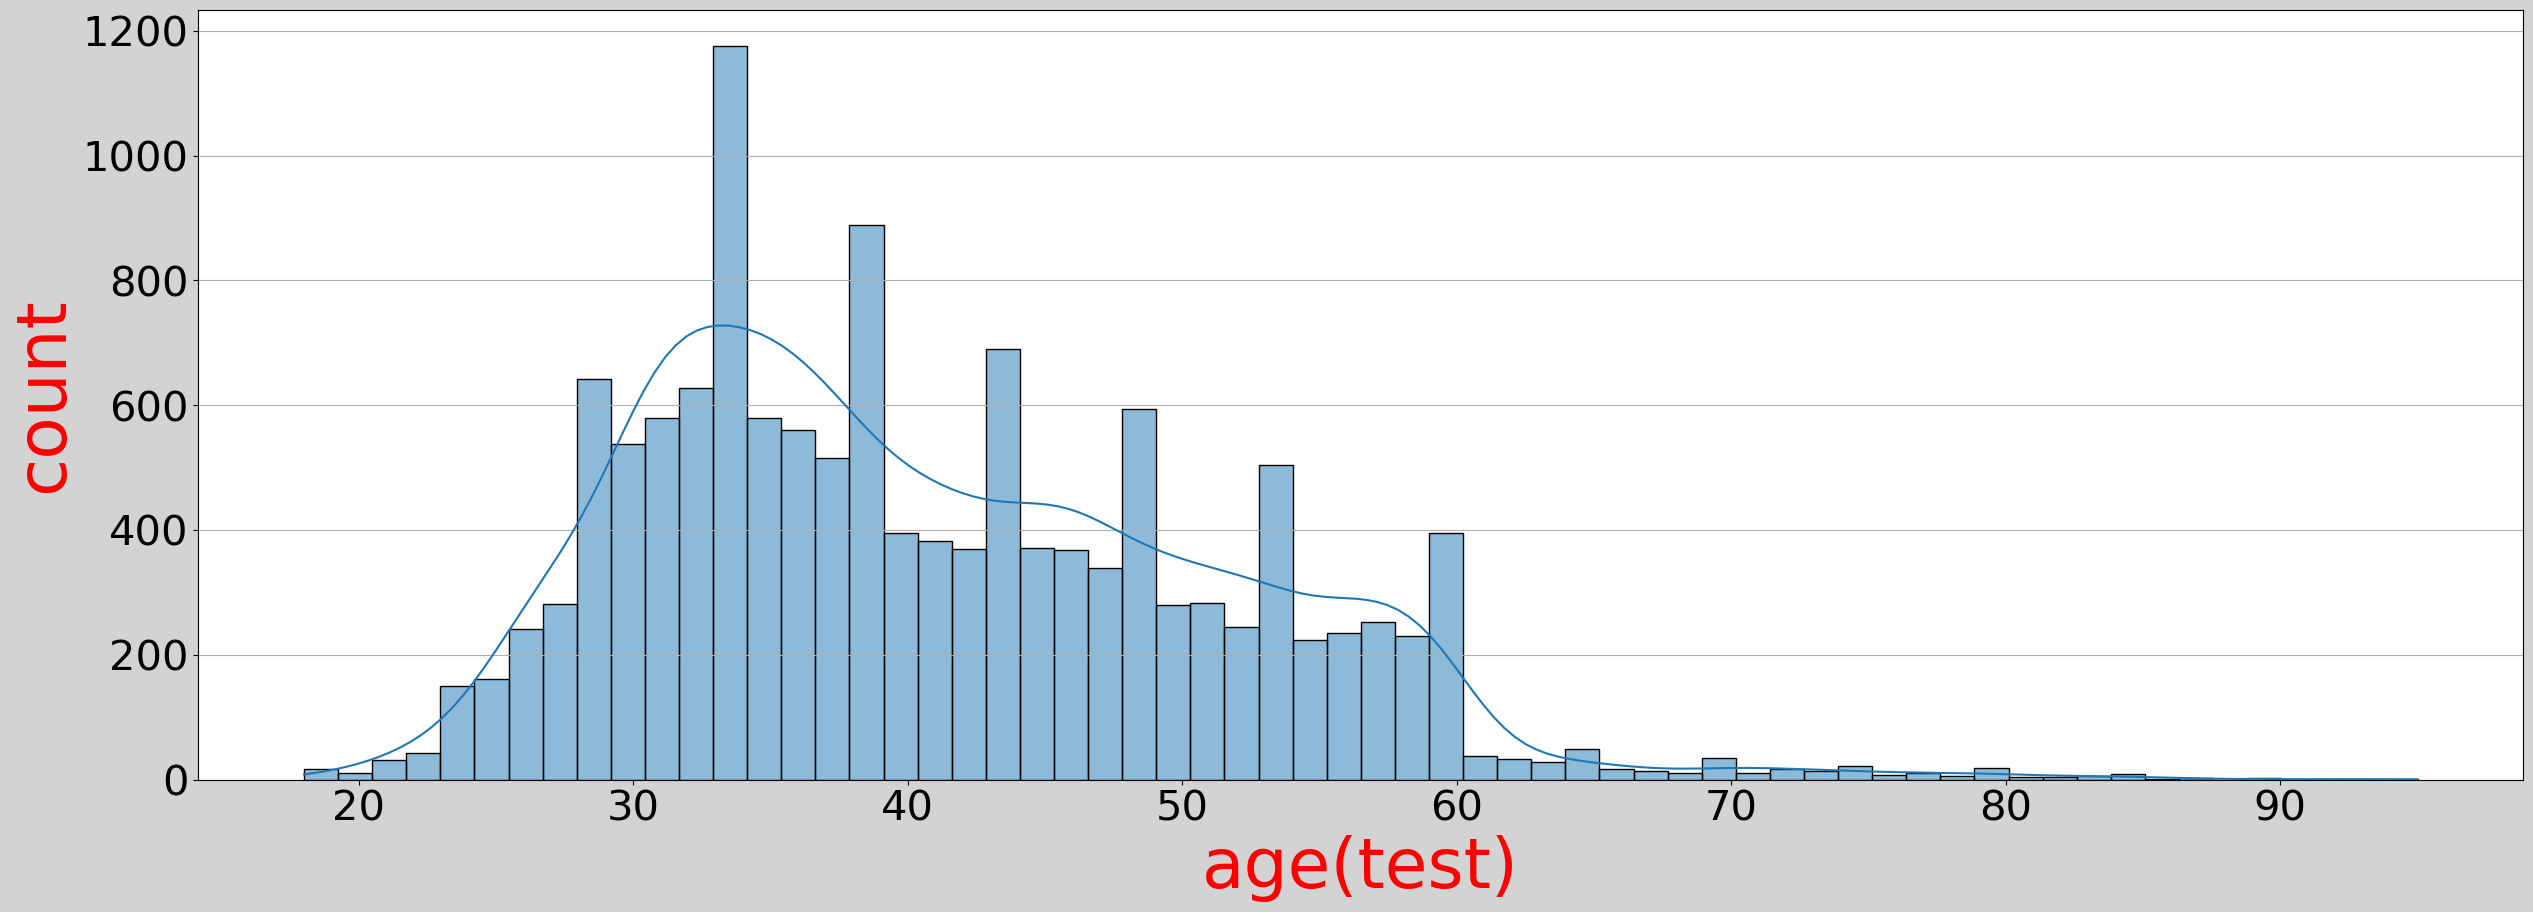

In [18]:
plt.figure(figsize=(30, 10), facecolor="lightblue")
sns.histplot(x = 'age' ,data = dftrain, kde = True)
plt.xlabel('age(train)', color='r', fontsize=50)
plt.ylabel('count', color='r', fontsize=50)
plt.grid(axis='y')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
plt.figure(figsize=(30, 10), facecolor="lightgrey")
sns.histplot(x = 'age' ,data = dftest , kde = True)
plt.xlabel('age(test)', color='r', fontsize=50)
plt.ylabel('count', color='r', fontsize=50)
plt.grid(axis='y')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

here we can observe that in both the dataset most of people have age  of 30-40 

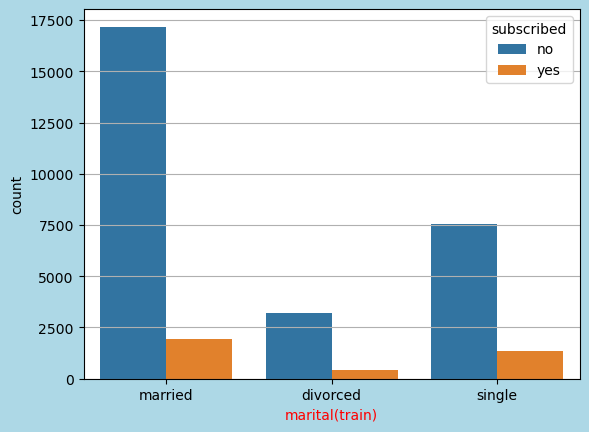

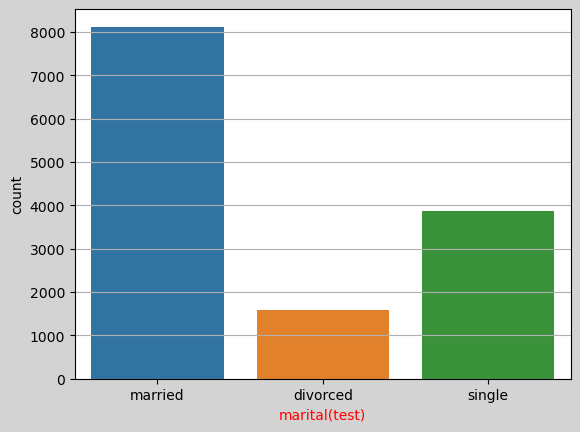

data for trained dataset 
  married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 
---------
 data for test dataset 
  married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


In [19]:
plt.figure( facecolor="lightblue")
sns.countplot(x='marital', data=dftrain,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('marital(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey")
sns.countplot(x='marital', data=dftest)
plt.grid(axis ='y')
plt.xlabel('marital(test)', color='r')
plt.show()
print('data for trained dataset \n ', dftrain['marital'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['marital'].value_counts())


here we can observe that in both dataset most of the customers are married.
and maximum number of married customer subscribed if we compared to divorced and single

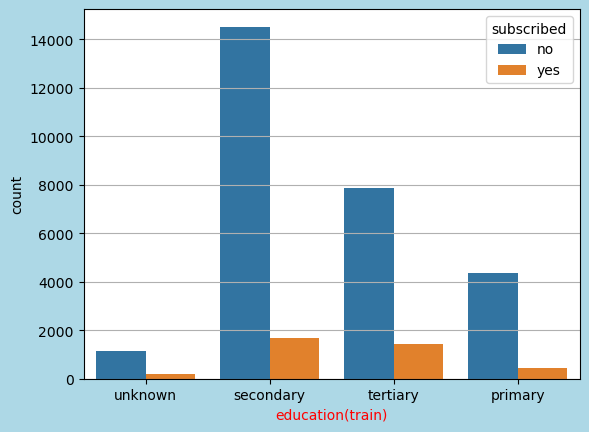

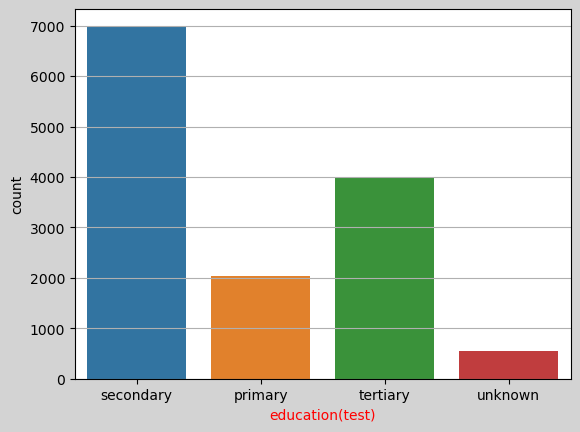

data for trained dataset 
  secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 
---------
 data for test dataset 
  secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


In [20]:
plt.figure( facecolor="lightblue")
sns.countplot(x='education', data=dftrain,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('education(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey")
sns.countplot(x='education', data=dftest)
plt.grid(axis ='y')
plt.xlabel('education(test)', color='r')
plt.show()
print('data for trained dataset \n ', dftrain['education'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['education'].value_counts())


here we observe in both datatype number of customer who has secondary education are more compare to others. and these customer subscribed more compare to others in trained datset.

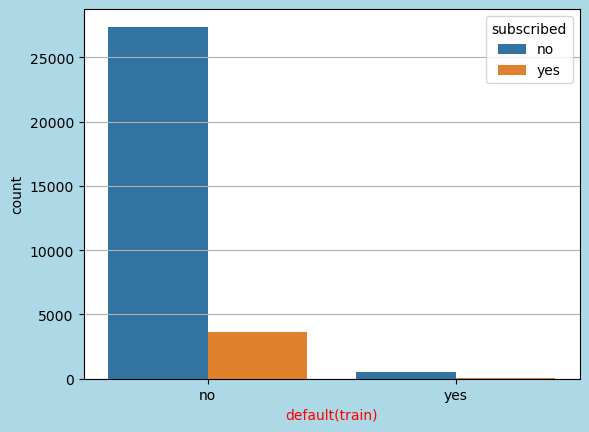

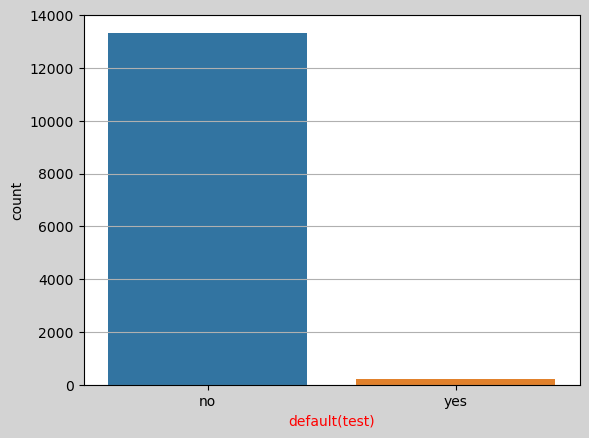

data for trained dataset 
  no     31062
yes      585
Name: default, dtype: int64 
---------
 data for test dataset 
  no     13334
yes      230
Name: default, dtype: int64


In [21]:
plt.figure( facecolor="lightblue")
sns.countplot(x='default', data=dftrain, hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('default(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey")
sns.countplot(x='default', data=dftest)
plt.grid(axis ='y')
plt.xlabel('default(test)', color='r')
plt.show()
print('data for trained dataset \n ', dftrain['default'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['default'].value_counts())


here we observe in both datatype number of customer who  do not defaulted  are more compare to others. and these customer subscribed more compare to others in trained datset.

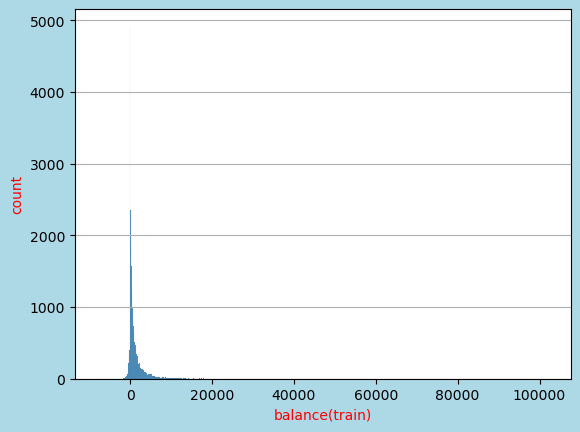

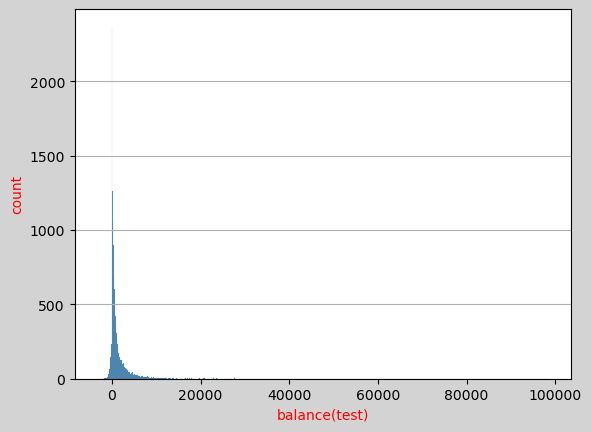

In [22]:
plt.figure( facecolor="lightblue")
sns.histplot(x = 'balance' ,data = dftrain)
plt.xlabel('balance(train)', color='r')
plt.ylabel('count', color='r')
plt.grid(axis='y')
plt.show()
plt.figure( facecolor="lightgrey")
sns.histplot(x = 'balance' ,data = dftest)
plt.xlabel('balance(test)', color='r')
plt.ylabel('count', color='r')
plt.grid(axis='y')
plt.show()

here in both the dataset we can see that data is positively skewed we will see and solve this later in this model. 

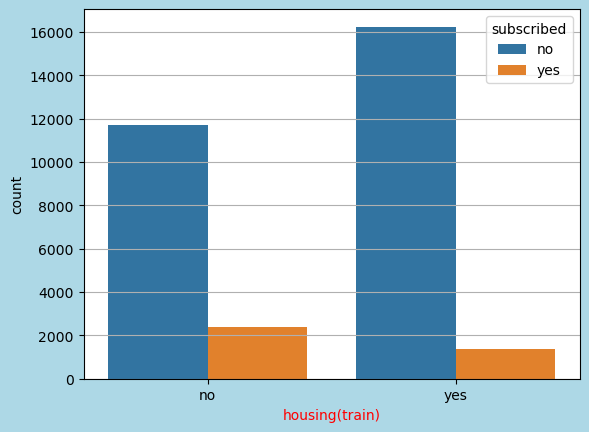

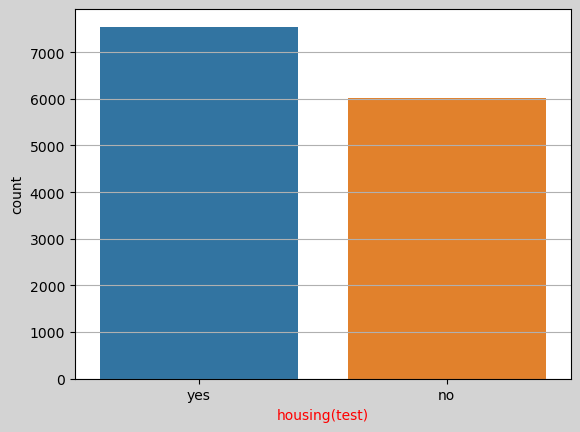

data for trained dataset 
  yes    17584
no     14063
Name: housing, dtype: int64 
---------
 data for test dataset 
  yes    7546
no     6018
Name: housing, dtype: int64


In [23]:
plt.figure( facecolor="lightblue")
sns.countplot(x='housing', data=dftrain,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('housing(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey")
sns.countplot(x='housing', data=dftest)
plt.grid(axis ='y')
plt.xlabel('housing(test)', color='r')
plt.show()
print('data for trained dataset \n ', dftrain['housing'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['housing'].value_counts())


here we can observe that in both datset the people who have housing loans are more than who dont and in oour trained datset customers who have no housing loans have subsribed more compare to who do

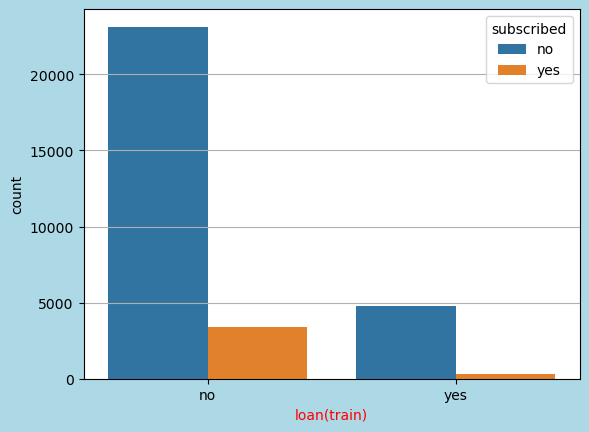

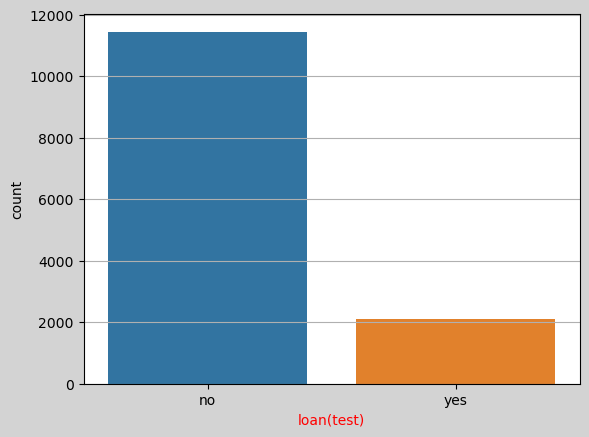

data for trained dataset 
  no     26516
yes     5131
Name: loan, dtype: int64 
---------
 data for test dataset 
  no     11451
yes     2113
Name: loan, dtype: int64


In [24]:
plt.figure( facecolor="lightblue")
sns.countplot(x='loan', data=dftrain,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('loan(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey")
sns.countplot(x='loan', data=dftest)
plt.grid(axis ='y')
plt.xlabel('loan(test)', color='r')
plt.show()
print('data for trained dataset \n ', dftrain['loan'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['loan'].value_counts())


here we can observe that in both datset the people who have no Personal loans are more than who do and in our trained datset customers who have no personal loans have subsribed more compare to who do

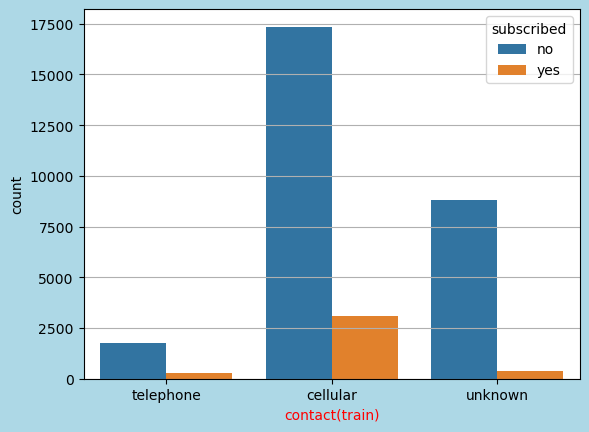

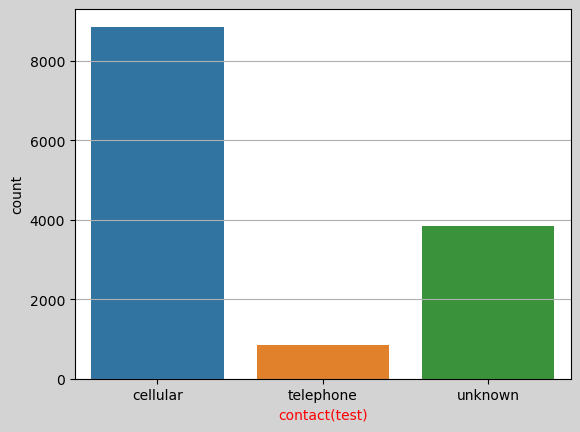

data for trained dataset 
  cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64 
---------
 data for test dataset 
  cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64


In [25]:
plt.figure( facecolor="lightblue")
sns.countplot(x='contact', data=dftrain,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('contact(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey")
sns.countplot(x='contact', data=dftest)
plt.grid(axis ='y')
plt.xlabel('contact(test)', color='r')
plt.show()
print('data for trained dataset \n ', dftrain['contact'].value_counts(),'\n---------\n','data for test dataset \n ',dftest['contact'].value_counts())


here we can observe in our dataset the cellular customers are more in both trained and test dataset. and they subscribed more compare to others

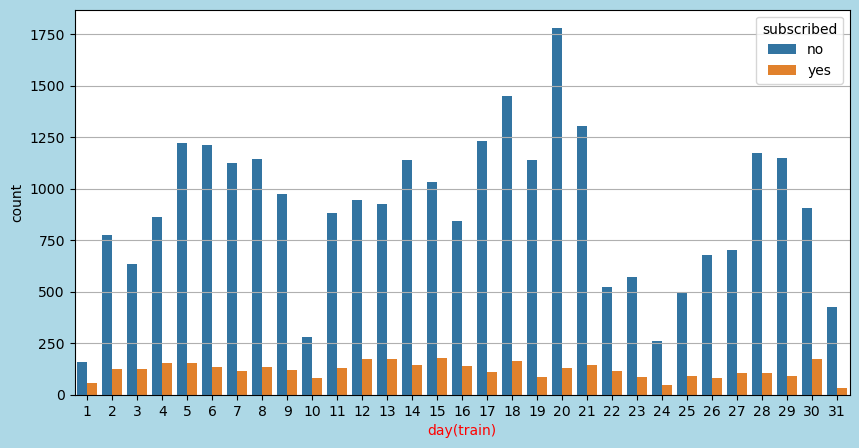

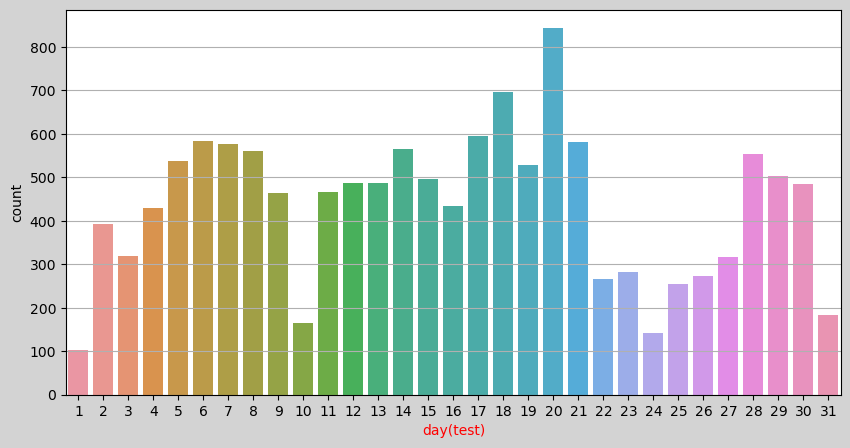

In [26]:
plt.figure( facecolor="lightblue", figsize =(10,5))
sns.countplot(x='day', data=dftrain,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('day(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey",figsize =(10,5))
sns.countplot(x='day', data=dftest)
plt.grid(axis ='y')
plt.xlabel('day(test)', color='r')
plt.show()


here we can observe in both the dataset at day 20 number of customers are more compared to other days and in our trained dataset on day 15 and 30 more customer subscribed.  

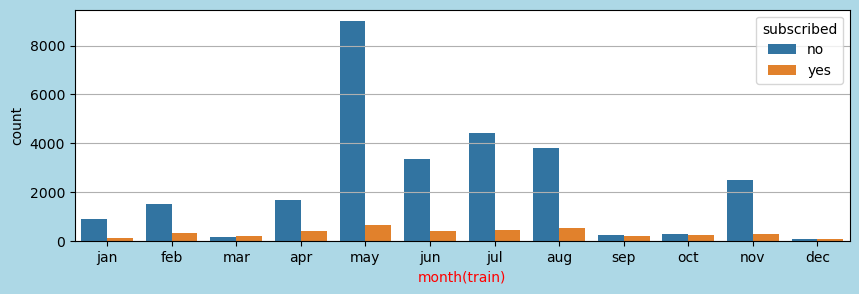

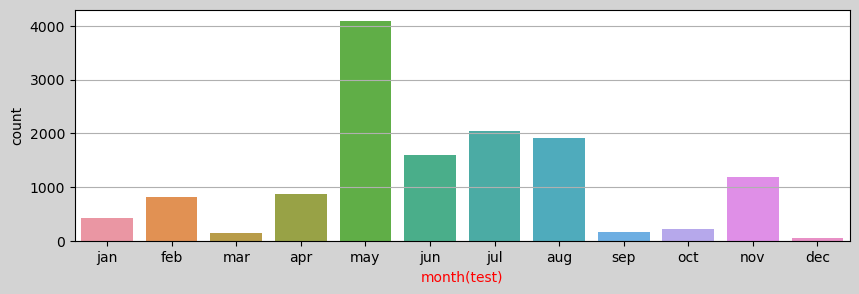

In [27]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure( facecolor="lightblue", figsize =(10,3))
sns.countplot(x='month', data=dftrain, order=month_order,hue = 'subscribed')
plt.grid(axis ='y')
plt.xlabel('month(train)', color='r')
plt.show()
plt.figure( facecolor="lightgrey",figsize =(10,3))
sns.countplot(x='month', data=dftest,order=month_order)
plt.grid(axis ='y')
plt.xlabel('month(test)', color='r')
plt.show()


here we can observe in both the dataset that more customers have may as a contract month. and in our trained dataset in that more people subscribed in may and august compare to other months.

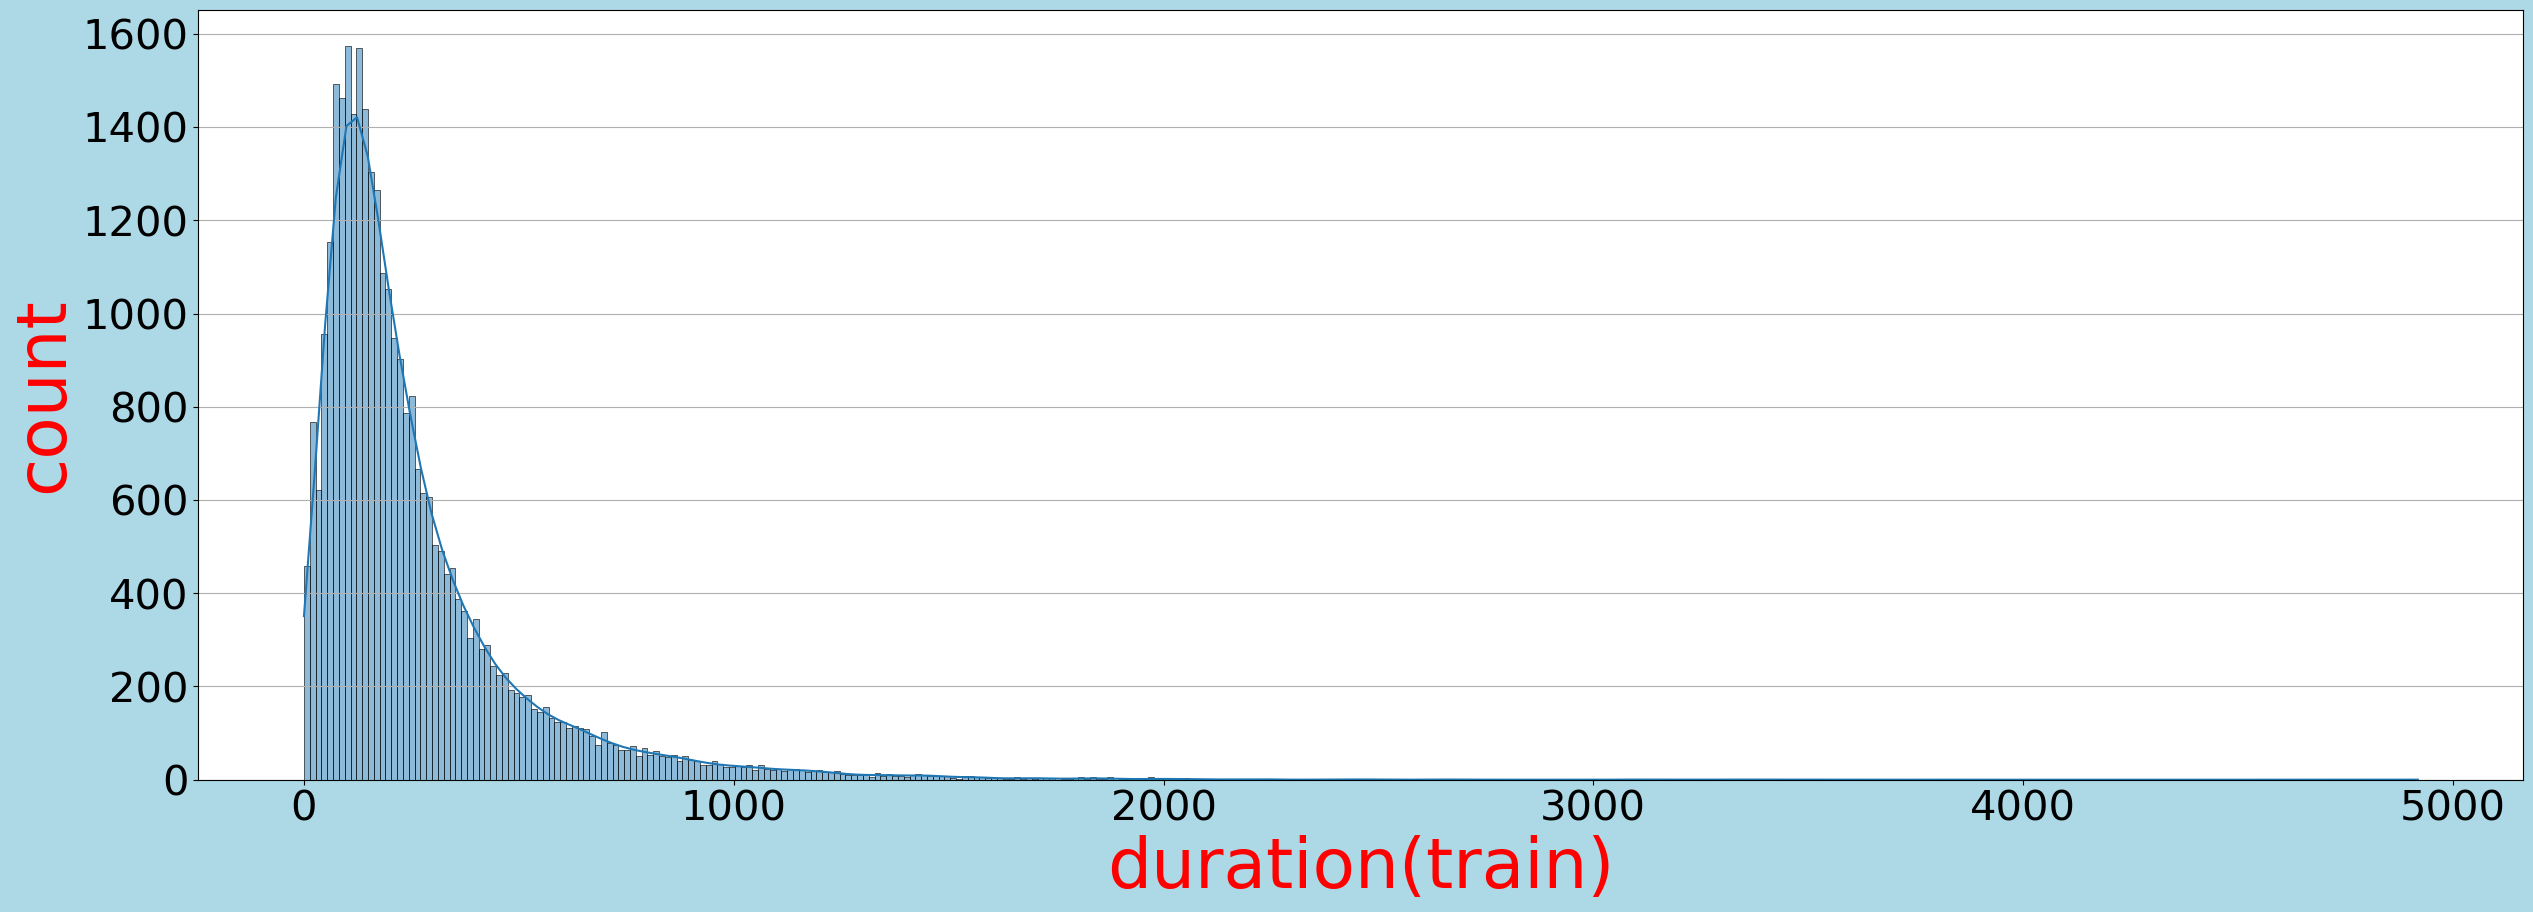

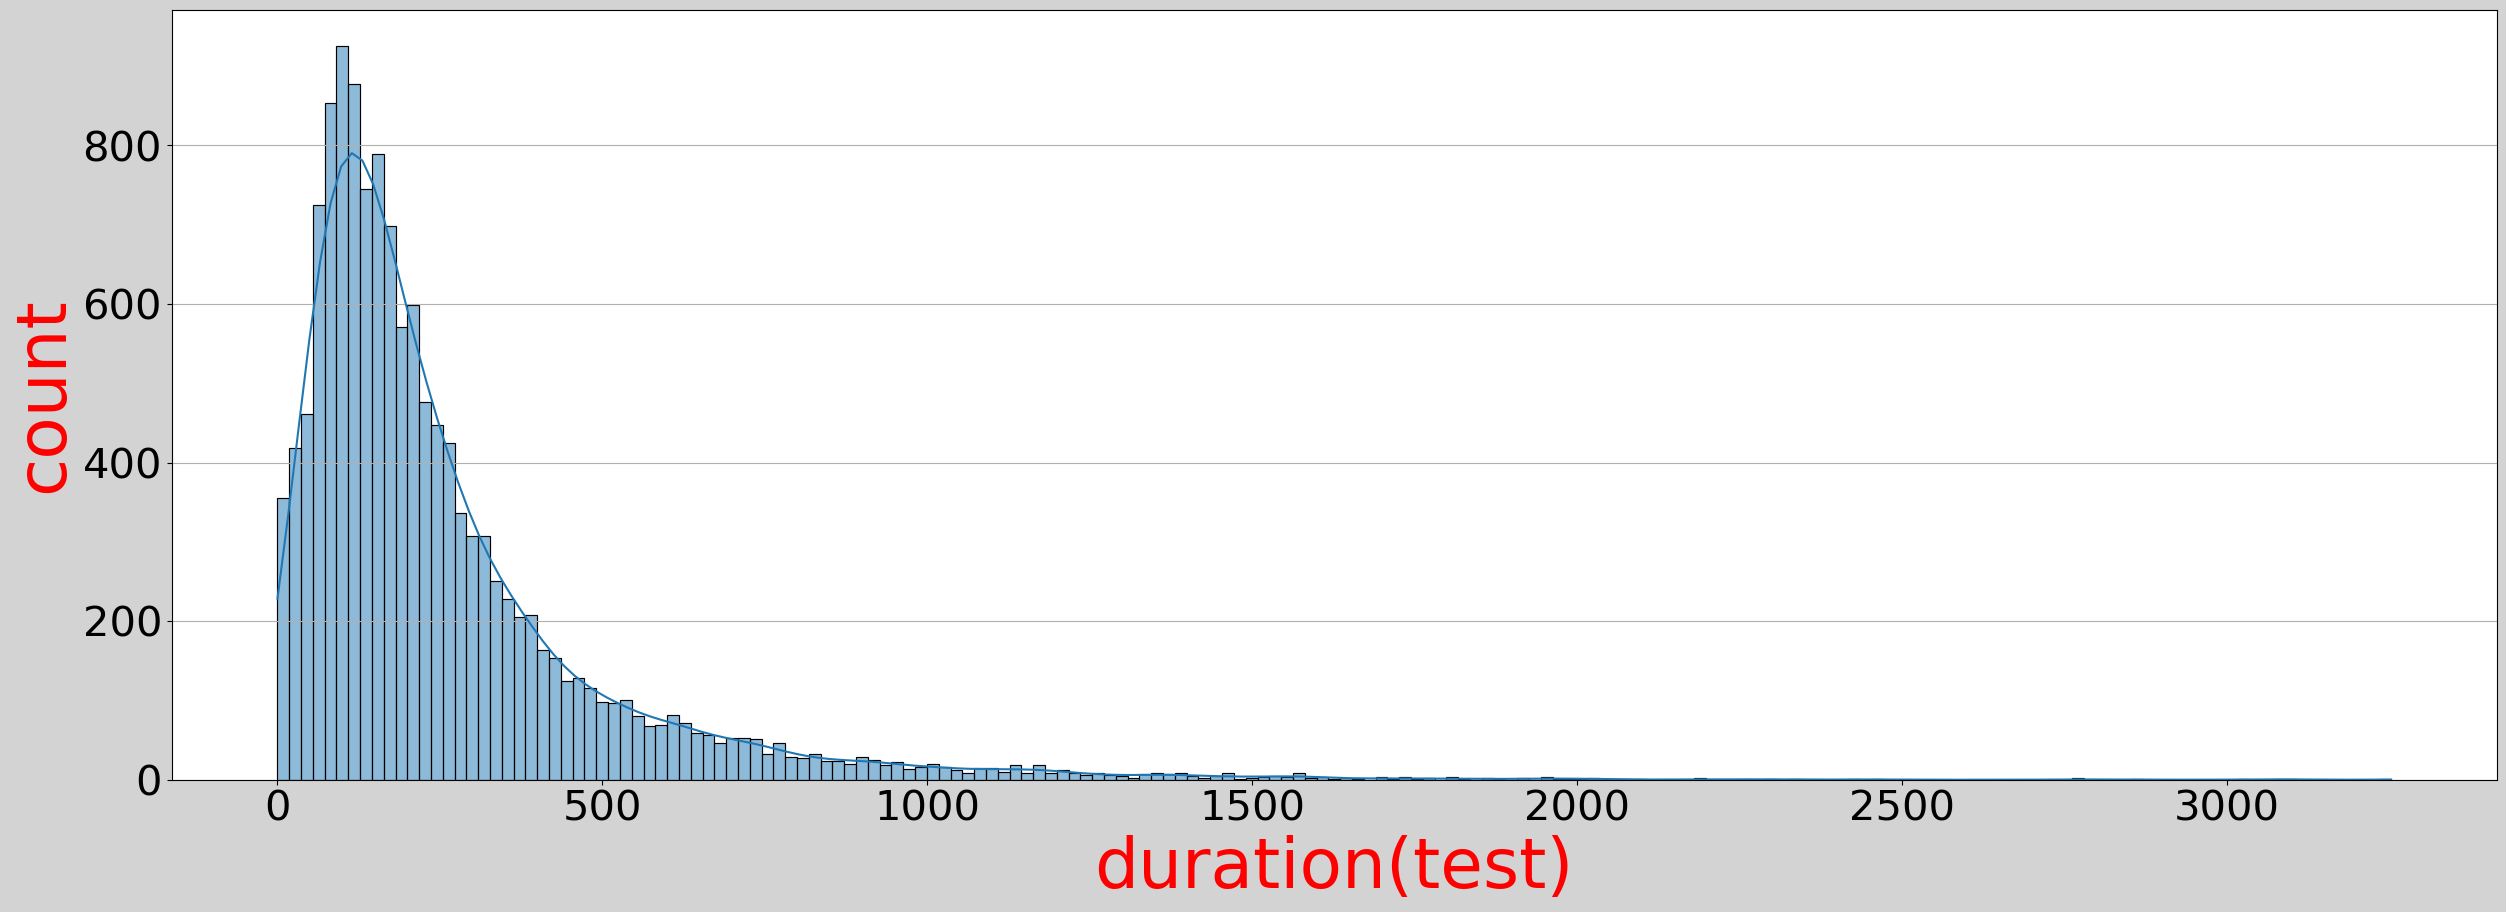

In [28]:
plt.figure(figsize=(30, 10), facecolor="lightblue")
sns.histplot(x = 'duration' ,data = dftrain, kde = True)
plt.xlabel('duration(train)', color='r', fontsize=50)
plt.ylabel('count', color='r', fontsize=50)
plt.grid(axis='y')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
plt.figure(figsize=(30, 10), facecolor="lightgrey")
sns.histplot(x = 'duration' ,data = dftest , kde = True)
plt.xlabel('duration(test)', color='r', fontsize=50)
plt.ylabel('count', color='r', fontsize=50)
plt.grid(axis='y')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

here we can observe that in our both the dataset most of customers have short duration contracts 

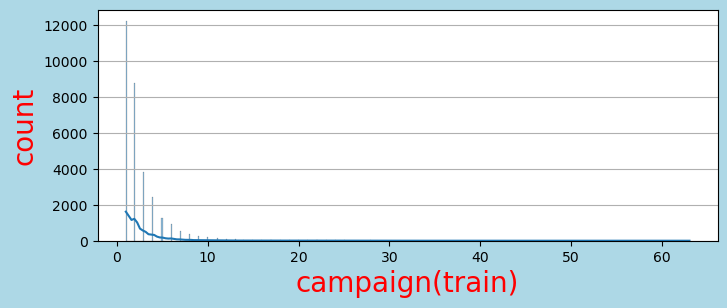

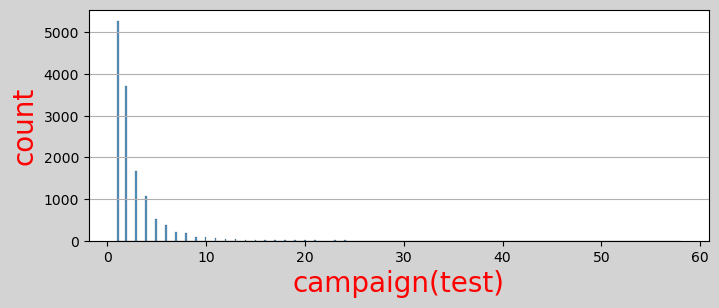

In [29]:
plt.figure(figsize=(8, 3), facecolor="lightblue")
sns.histplot(x = 'campaign' ,data = dftrain , kde = True)
plt.xlabel('campaign(train)', color='r', fontsize=20)
plt.ylabel('count', color='r', fontsize=20)
plt.grid(axis='y')
plt.show()
plt.figure(figsize=(8, 3), facecolor="lightgrey")
sns.histplot(x = 'campaign' ,data = dftest)
plt.xlabel('campaign(test)', color='r', fontsize=20)
plt.ylabel('count', color='r', fontsize=20)
plt.grid(axis='y')
plt.show()

here we can observe most customers have less campaign 

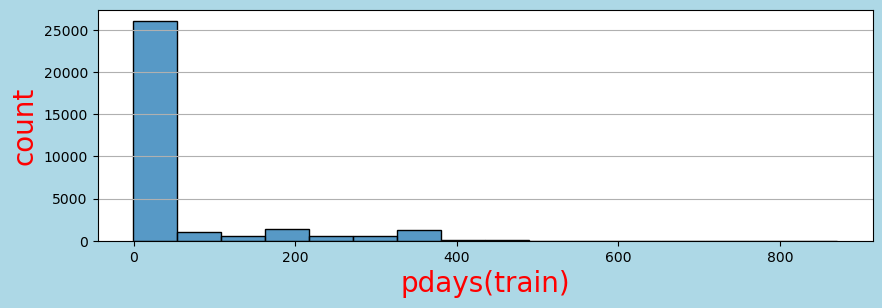

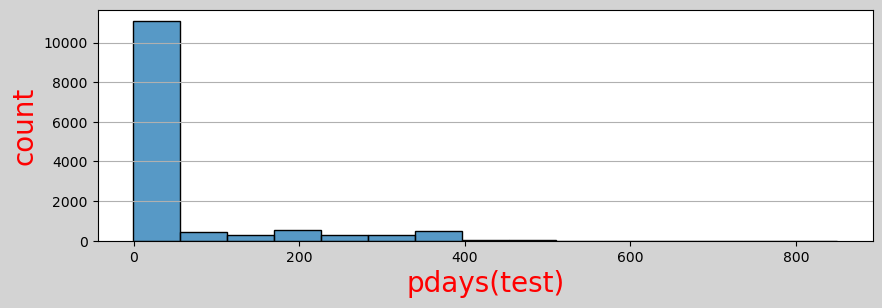

In [30]:
plt.figure(figsize=(10, 3), facecolor="lightblue")
sns.histplot(x = 'pdays' ,data = dftrain)
plt.xlabel('pdays(train)', color='r', fontsize=20)
plt.ylabel('count', color='r', fontsize=20)
plt.grid(axis='y')
plt.show()
plt.figure(figsize=(10, 3), facecolor="lightgrey")
sns.histplot(x = 'pdays' ,data = dftest)
plt.xlabel('pdays(test)', color='r', fontsize=20)
plt.ylabel('count', color='r', fontsize=20)
plt.grid(axis='y')
plt.show()

here we can observe that in our both the dataset that more customers are contacted frequently.

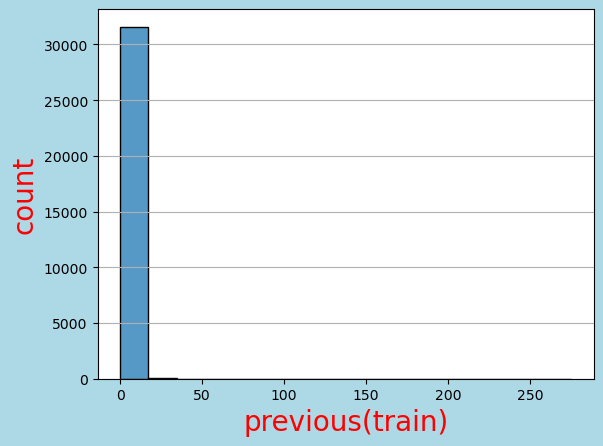

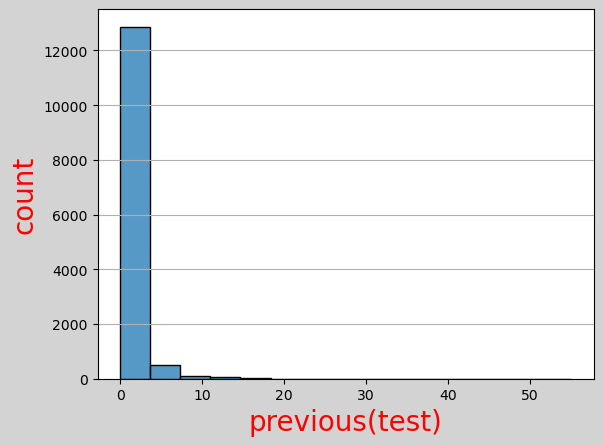

In [31]:
plt.figure( facecolor="lightblue")
sns.histplot(x = 'previous' ,data = dftrain )
plt.xlabel('previous(train)', color='r', fontsize=20)
plt.ylabel('count', color='r', fontsize=20)
plt.grid(axis='y')
plt.show()
plt.figure( facecolor="lightgrey")
sns.histplot(x = 'previous' ,data = dftest)
plt.xlabel('previous(test)', color='r', fontsize=20)
plt.ylabel('count', color='r', fontsize=20)
plt.grid(axis='y')
plt.show()

here we can observe in both dataset that outcome most of customers hase previous are close to 0

Separating numerical and categorical columns

In [129]:
dftrain1 = dftrain[['balance','age','duration','previous','campaign','pdays']]
dftrain2 = dftest.drop(columns=dftrain1.columns)
dftrain2 = dftrain2.drop(['ID'],axis= 1) 
dftest1 = dftest[['balance','age','duration','previous','campaign','pdays']]
dftest2 = dftest.drop(columns=dftest1.columns) 
dftest2 = dftest2.drop(['ID'],axis= 1) 

### -- Checking for Outliers

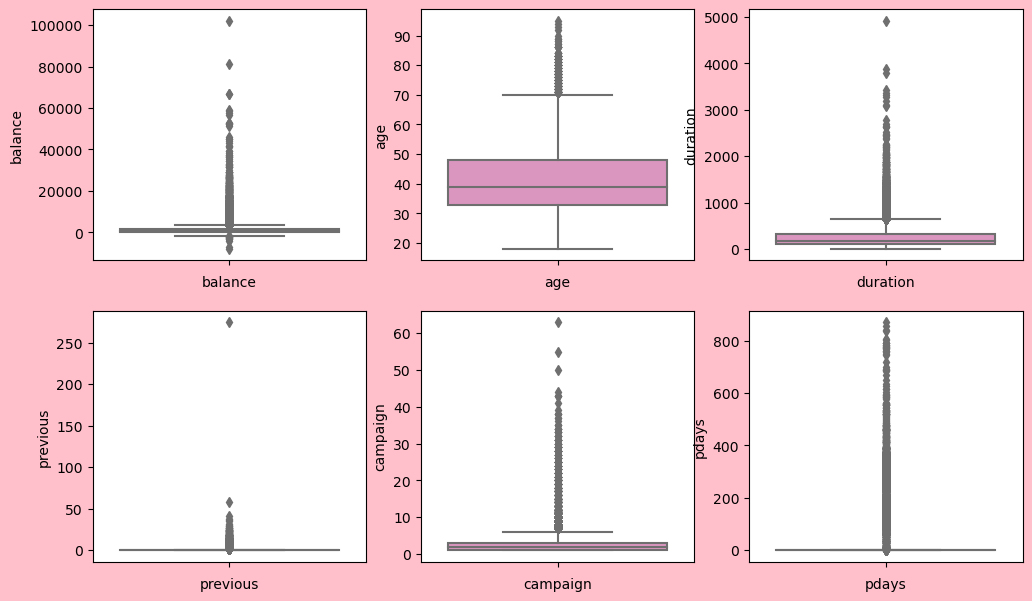

In [130]:
plt.figure(figsize=(12, 15), facecolor="pink")
plotnumber = 1

for column in dftrain1:  
    if plotnumber <= 6:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot( y = dftrain1[column] , palette = 'Set2_r')
        plt.xlabel(column)
    plotnumber += 1

plt.show()

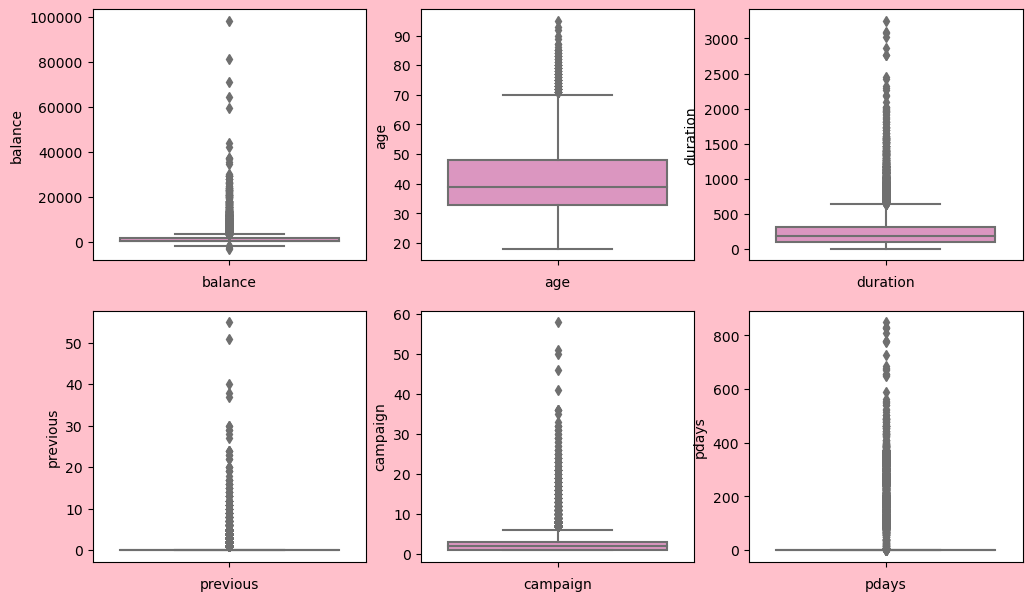

In [131]:
plt.figure(figsize=(12, 15), facecolor="pink")
plotnumber = 1

for column in dftest1:  
    if plotnumber <= 6:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot( y = dftest1[column] , palette = 'Set2_r')
        plt.xlabel(column)
    plotnumber += 1

plt.show()

we can see there are outliers present in the  both train and test data so we will remove the outliers by using zscore in both train and test data

- for train dataset

-- by using z score 

In [132]:
from scipy.stats import zscore
z = np.abs(zscore(dftrain1))
z

,balance,age,duration,previous,campaign,pdays
0,0.187933,1.415793,0.832754,0.237059,0.245906,0.408555
1,0.449397,0.937156,0.649957,0.237059,0.245906,0.408555
2,0.156159,1.313627,0.070449,0.237059,0.567059,0.408555
3,0.635055,1.509911,2.368149,1.001336,0.567059,0.447299
4,0.411091,0.937156,0.474054,0.237059,0.567059,0.408555
...,...,...,...,...,...,...
31642,0.450388,1.125392,0.552724,0.237059,0.245906,0.408555
31643,0.324903,1.133439,0.699635,0.237059,0.245906,0.408555
31644,0.347358,0.843038,0.859979,0.237059,0.075247,0.408555
31645,0.376088,1.509911,0.918319,4.716521,1.359859,2.994723


In [133]:
np.where(z>3.1)

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64),
 array([4, 0, 5, ..., 5, 3, 2], dtype=int64))

In [134]:
dftrain3= dftrain[(z<3.1).all(axis=1)]

In [135]:
dftrain3.shape

(28525, 18)

In [136]:
print('percentage of dataloss',((dftrain.shape[0]-dftrain3.shape[0])/dftrain.shape[0])*100)

percentage of dataloss 9.86507409865074


by using Interquartile range

In [137]:
Q1 = dftrain1.quantile(0.25)
Q3 = dftrain1.quantile(0.75)
IQR = Q3 - Q1
dftrain3Q = dftrain1[~((dftrain1 < (Q1-1.5*IQR)) |(dftrain1> (Q3 + 1.5*IQR))).any(axis=1)]

In [138]:
print('percentage of dataloss',((dftrain1.shape[0]-dftrain3Q.shape[0])/dftrain1.shape[0])*100)

percentage of dataloss 37.437987802951305


- for the test dataset

In [139]:
from scipy.stats import zscore
z = np.abs(zscore(dftest1))
z

,balance,age,duration,previous,campaign,pdays
0,0.402389,0.838114,0.921849,0.297500,1.058702,0.418199
1,0.463375,3.499987,0.439963,0.297500,0.574850,0.418199
2,0.393955,0.932421,1.616074,0.297500,0.574850,0.418199
3,0.784508,1.519549,0.747754,0.297500,0.248140,0.418199
4,0.669352,0.387871,0.569789,0.297500,0.574850,0.418199
...,...,...,...,...,...,...
13559,0.426069,0.177969,0.426644,0.297500,0.405281,0.418199
13560,0.299239,1.236630,0.387957,0.297500,0.574850,0.418199
13561,0.348218,0.555195,0.473070,0.297500,0.574850,0.418199
13562,0.290155,1.121034,0.194517,1.203911,0.248140,0.483926


In [140]:
np.where(z>3)

(array([    1,     9,    14, ..., 13550, 13555, 13563], dtype=int64),
 array([1, 5, 0, ..., 2, 4, 5], dtype=int64))

In [141]:
dftest3= dftest[(z<3.1).all(axis=1)]

In [142]:
dftest3.shape

(12230, 17)

In [143]:
print('percentage of dataloss',((dftest.shape[0]-dftest3.shape[0])/dftest.shape[0])*100)

percentage of dataloss 9.834856974343852


we will use zscore to remove the outliers from both train and test data as dataloss percentage is compared to interquartile is low  

In [145]:
dftrain = dftrain3

In [144]:
dftest=dftest3

In [146]:
dftrain1 = dftrain[['balance','age','duration','previous','campaign','pdays']]
dftrain2 = dftest.drop(columns=dftrain1.columns)
dftrain2 = dftrain2.drop(['ID'],axis= 1) 
dftest1 = dftest[['balance','age','duration','previous','campaign','pdays']]
dftest2 = dftest.drop(columns=dftest1.columns) 
dftest2 = dftest2.drop(['ID'],axis= 1) 

### -- Checking for Skewness

-- train dataset 

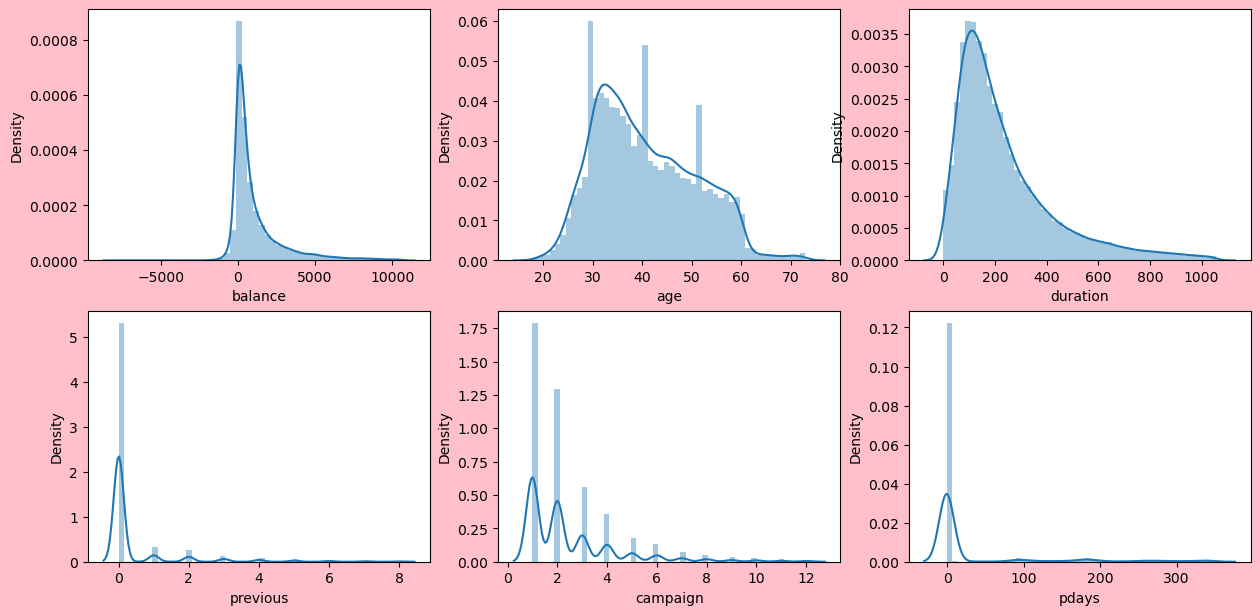

In [25]:
plt.figure(figsize=(15, 15), facecolor="pink")
plotnumber = 1

for column in dftrain1:  
    if plotnumber <= 6:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot( dftrain1[column] )
        plt.xlabel(column)
    plotnumber += 1

plt.show()

In [26]:
dftrain.skew()

ID          0.059842
age         0.458584
balance     2.460376
day         0.078693
duration    1.624652
campaign    2.066003
pdays       2.729821
previous    3.707104
dtype: float64

we can see from the plots and data that balance , duration are rightly skewed and camapiign , pdays , previous are categorical columns

we will remove the skewness' 

In [27]:
dftrain['balance']=np.cbrt(dftrain['balance'])

In [28]:
dftrain.skew()

ID          0.059842
age         0.458584
balance    -0.432784
day         0.078693
duration    1.624652
campaign    2.066003
pdays       2.729821
previous    3.707104
dtype: float64

In [29]:
dftrain['duration']=np.sqrt(dftrain['duration'])

In [30]:
dftrain.skew()

ID          0.059842
age         0.458584
balance    -0.432784
day         0.078693
duration    0.692600
campaign    2.066003
pdays       2.729821
previous    3.707104
dtype: float64

--here we can see we removed the skewness by usuing the cuberoot and squarteroot method

--test dataset 

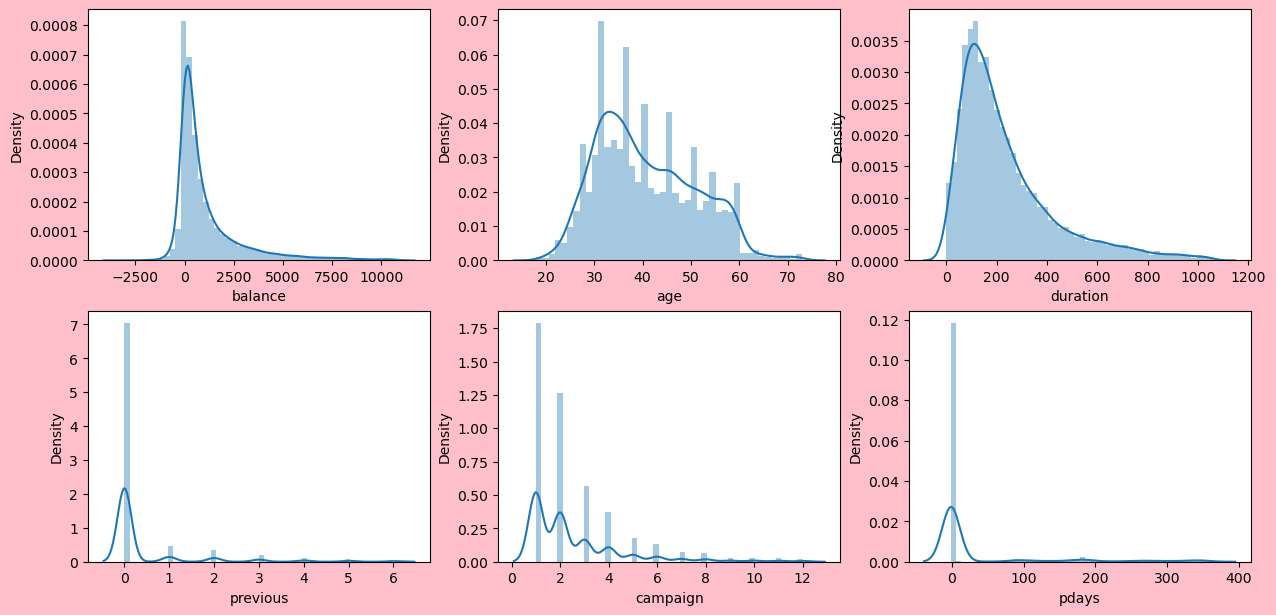

In [31]:
plt.figure(figsize=(15, 15), facecolor="pink")
plotnumber = 1

for column in dftest1:  
    if plotnumber <= 6:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(dftest1[column])
        plt.xlabel(column)
    plotnumber += 1

plt.show()

In [32]:
dftest.skew()

ID          0.045040
age         0.457413
balance     2.507610
day         0.104645
duration    1.610720
campaign    2.095107
pdays       2.646454
previous    3.317135
dtype: float64

we can see from the plots and data that balance , duration are rightly skewed and camapiign , pdays , previous are categorical columns

we will remove the skewness' 

In [147]:
dftest['duration']=np.sqrt(dftest['duration'])

In [148]:
dftest.skew()

ID          0.045040
age         0.457413
balance     2.507610
day         0.104645
duration    0.672004
campaign    2.095107
pdays       2.646454
previous    3.317135
dtype: float64

In [149]:
dftest['balance']=np.cbrt(dftest['balance'])

In [150]:
dftest.skew()

ID          0.045040
age         0.457413
balance    -0.406344
day         0.104645
duration    0.672004
campaign    2.095107
pdays       2.646454
previous    3.317135
dtype: float64

In [153]:
dftest_p = dftest

--here we can see we removed the skewness by usuing the cuberoot and squarteroot method

#### now we can see there is no feature that is highly skewed but some are moderately skewed and we will go furhter with moderately skewness

### Encoding the dataset 

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in dftrain.columns:
    if dftrain[column].dtype == 'object':
        dftrain[column] = label_encoder.fit_transform(dftrain[column])


In [46]:
dftrain

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,12.456918,0,0,1,19,9,6.633250,2,-1,0,3,0
1,40576,31,11,1,1,0,1.442250,0,0,0,20,5,9.539392,2,-1,0,3,0
2,15320,27,7,1,1,0,9.622603,1,0,0,18,5,15.491933,1,-1,0,3,0
3,43962,57,4,0,2,0,14.868480,0,0,0,22,6,29.444864,1,84,3,2,1
4,29842,31,9,1,1,0,4.918685,1,0,0,4,3,19.493589,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,14.371032,0,0,2,20,6,5.477226,4,-1,0,3,0
31641,9476,37,9,2,2,0,10.939057,0,0,2,6,6,21.023796,2,-1,0,3,0
31642,36483,29,4,2,2,0,0.000000,1,0,0,12,8,10.770330,2,-1,0,3,0
31643,40178,53,4,0,2,0,7.243156,0,1,0,5,6,20.928450,2,-1,0,3,1


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in dftest.columns:
    if dftest[column].dtype == 'object':
        dftest[column] = label_encoder.fit_transform(dftest[column])


In [38]:
dftest

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,4.904868,1,0,0,15,8,4.472136,6,-1,0,3
2,3709,31,6,2,2,0,5.241483,1,0,2,16,8,26.000000,1,-1,0,3
3,37422,57,7,2,0,0,15.573360,1,0,1,13,8,8.062258,2,-1,0,3
4,12527,45,1,0,1,0,-8.900130,0,1,2,3,5,10.535654,1,-1,0,3
5,16013,32,4,2,2,0,0.000000,1,0,0,22,5,21.330729,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,35237,32,9,2,1,0,5.052774,1,0,0,7,8,14.594520,1,-1,0,3
13559,23465,39,4,1,2,0,3.556893,0,0,0,28,1,12.165525,4,-1,0,3
13560,11743,54,1,1,0,0,13.163613,1,0,2,20,6,12.569805,1,-1,0,3
13561,28292,35,5,1,0,0,6.580844,1,0,0,29,4,11.661904,1,-1,0,3


### checking for correlation 

In [47]:
label_encoder = LabelEncoder()
for column in dftest.columns:
    if dftest[column].dtype == 'object':
        dftest[column] = label_encoder.fit_transform(dftest[column])

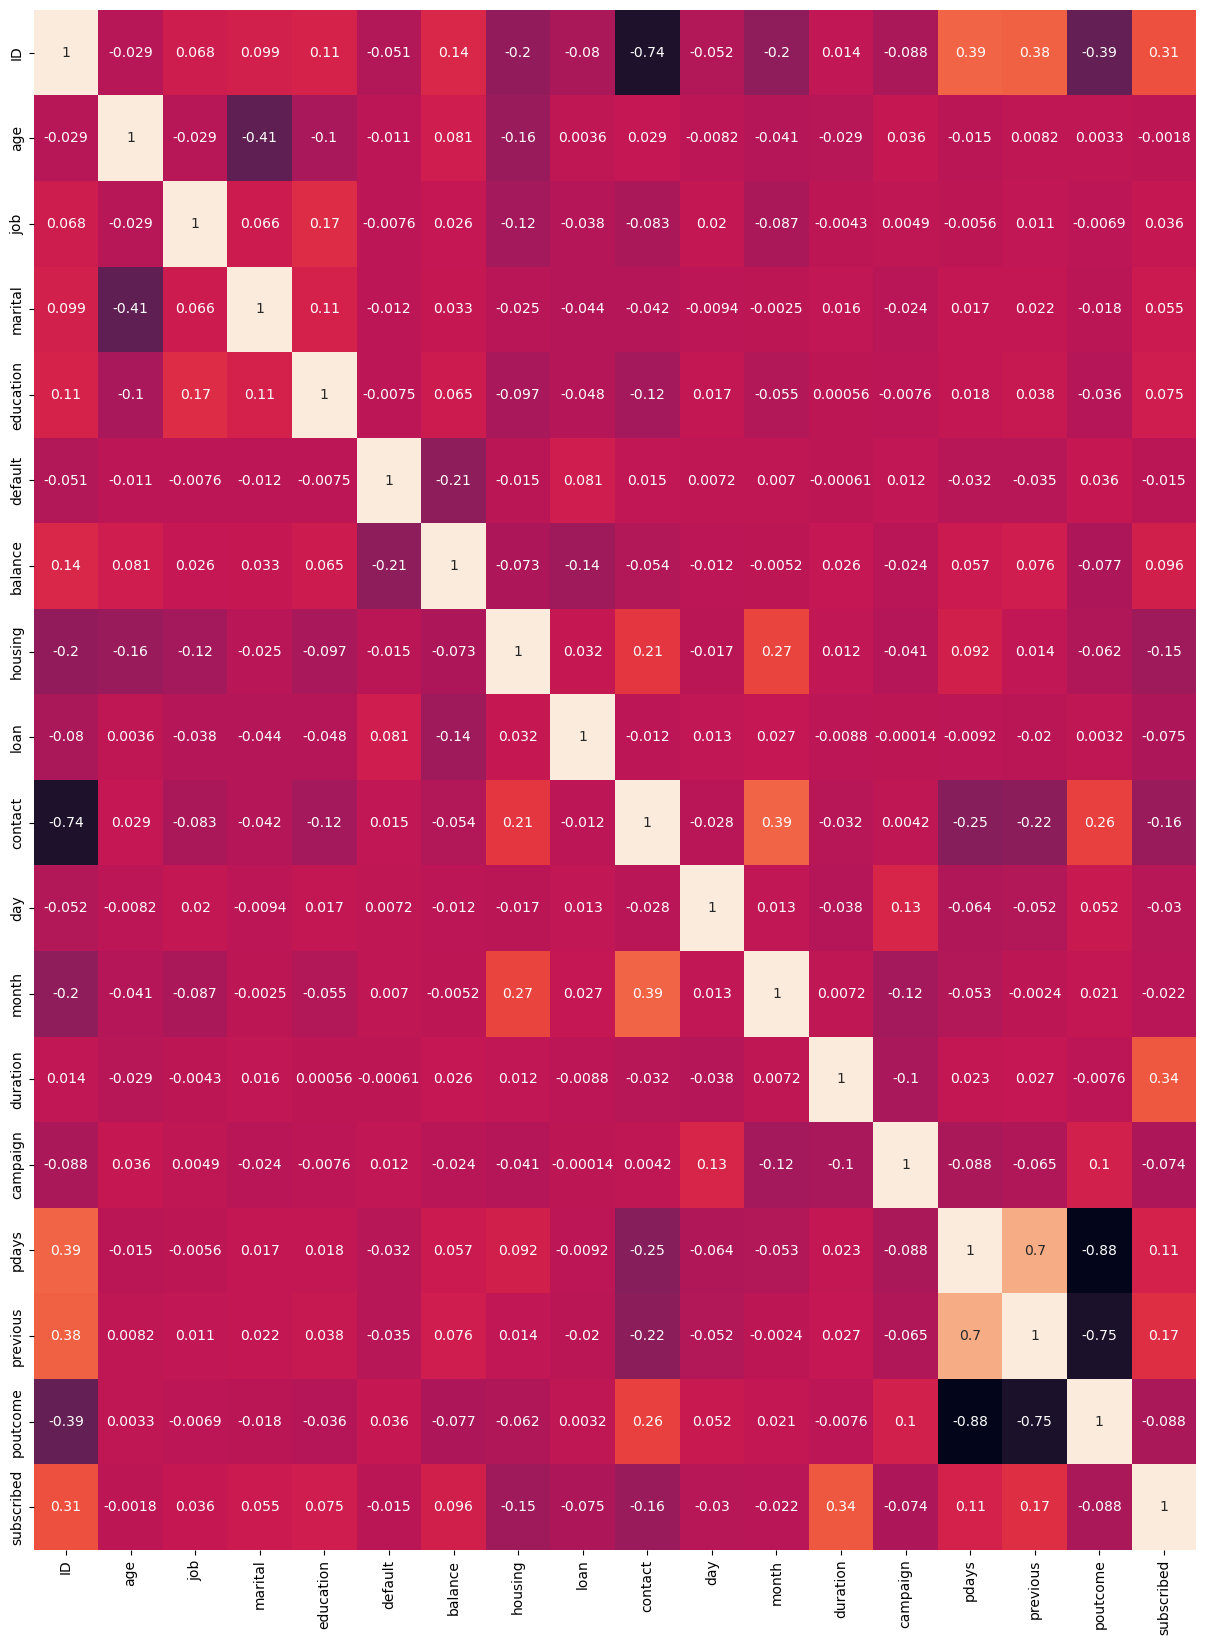

In [48]:
correlation = dftrain.corr()
plt.figure(figsize=(15,20))
sns.heatmap(correlation , annot = True , cbar = False)
plt.show()

here we can see that in our trained dataset our target variable has postive relationship with job, marital ,education, balance ,duration,  previous ,pdays and negative with the others.

we can see that poutcome has high correlation with pdays and previous  which can cause multicollinearity we will check it later in this model




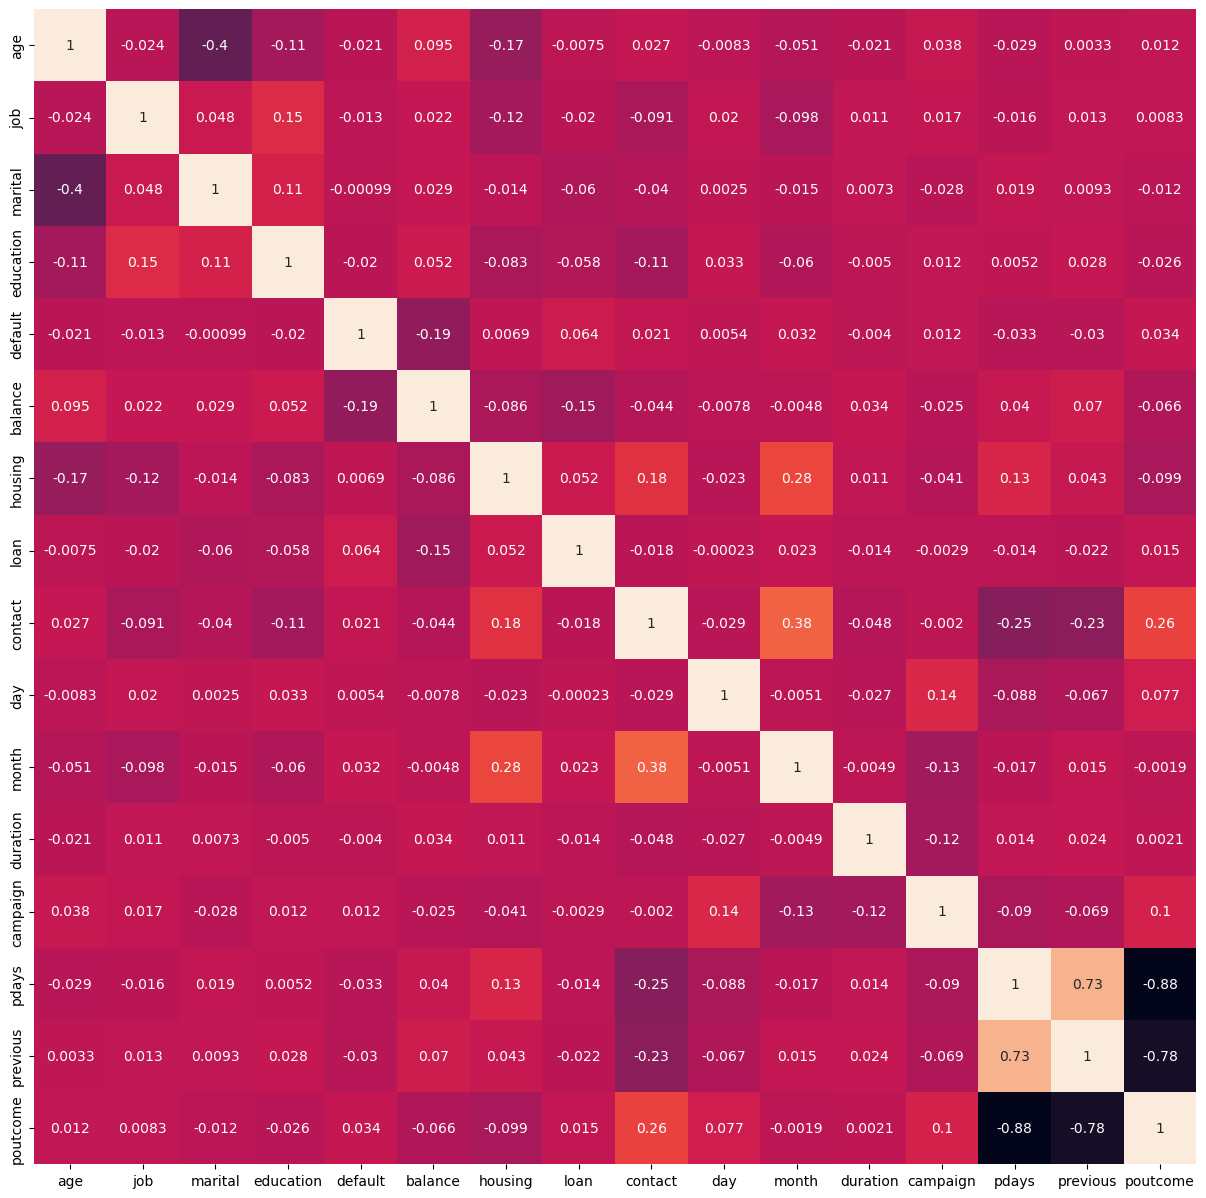

In [49]:
correlation = dftest.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation , annot = True, cbar= False)
plt.show()

 here in our test dataset , we can see that poutcome has high correlation with pdays and previous 

### Seperating features and target variable

In [50]:
X=  dftrain.drop(['ID','subscribed'], axis = 1)
Y=dftrain['subscribed'] 

### Scaling using Standard Scalar

In [51]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.515152,-1.319809,-0.277551,2.381895,-0.139564,0.854946,-1.112083,-0.446583,0.368594,0.378962,1.171857,-1.328705,-0.233461,-0.373733,-0.338010,0.392719
1,-0.954930,2.025153,-0.277551,-0.299805,-0.139564,-0.920197,-1.112083,-0.446583,-0.729833,0.498372,-0.163976,-0.824626,-0.233461,-0.373733,-0.338010,0.392719
2,-1.350143,0.808803,-0.277551,-0.299805,-0.139564,0.398163,0.899213,-0.446583,-0.729833,0.259553,-0.163976,0.207859,-0.751143,-0.373733,-0.338010,0.392719
3,1.613955,-0.103459,-1.928328,1.041045,-0.139564,1.243597,-1.112083,-0.446583,-0.729833,0.737191,0.169982,2.628035,-0.751143,0.742015,2.329872,-0.715543
4,-0.954930,1.416978,-0.277551,-0.299805,-0.139564,-0.359928,0.899213,-0.446583,-0.729833,-1.412180,-0.831893,0.901958,-0.751143,-0.373733,-0.338010,0.392719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28520,0.230710,-0.103459,1.373227,-0.299805,-0.139564,1.163428,-1.112083,-0.446583,1.467020,0.498372,0.169982,-1.529221,0.801904,-0.373733,-0.338010,0.392719
28521,-0.362110,1.416978,1.373227,1.041045,-0.139564,0.610325,-1.112083,-0.446583,1.467020,-1.173361,0.169982,1.167377,-0.233461,-0.373733,-0.338010,0.392719
28522,-1.152536,-0.103459,1.373227,1.041045,-0.139564,-1.152632,0.899213,-0.446583,-0.729833,-0.456904,0.837899,-0.611117,-0.233461,-0.373733,-0.338010,0.392719
28523,1.218742,-0.103459,-1.928328,1.041045,-0.139564,0.014687,-1.112083,2.239224,-0.729833,-1.292771,0.169982,1.150839,-0.233461,-0.373733,-0.338010,0.392719


### checking for Variance Inflation Factor

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif['Features'] = X.columns
vif
                                                                         

,VIF values,Features
0,1.272255,age
1,1.049228,job
2,1.228857,marital
3,1.066337,education
4,1.050182,default
5,1.090243,balance
6,1.183512,housing
7,1.029940,loan
8,1.325687,contact
9,1.026899,day


 we can conclude by seeing the variance inflation factor that we do not have the problerm of multicollinearity. although poutcome has litte more VIF but we will no remove that

## Oversampling 
 for making the data balanced

In [53]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(X,Y)

In [54]:
y1.value_counts()

0    25574
1    25574
Name: subscribed, dtype: int64

## Creating train test Split

In [55]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (x1,y1, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

#### AdaBoost Classifier

In [57]:
abc = AdaBoostClassifier()
abc.fit(X_train, Y_train)
y_pred = abc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8857172649305284


In [58]:
y_pred_testABC  = abc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testABC ) # checking test data 
print('accuracy score of test data-->',accuracy)

accuracy score of test data--> 0.8819895206068663


In [59]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testABC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6390
           1       0.88      0.88      0.88      6397

    accuracy                           0.88     12787
   macro avg       0.88      0.88      0.88     12787
weighted avg       0.88      0.88      0.88     12787



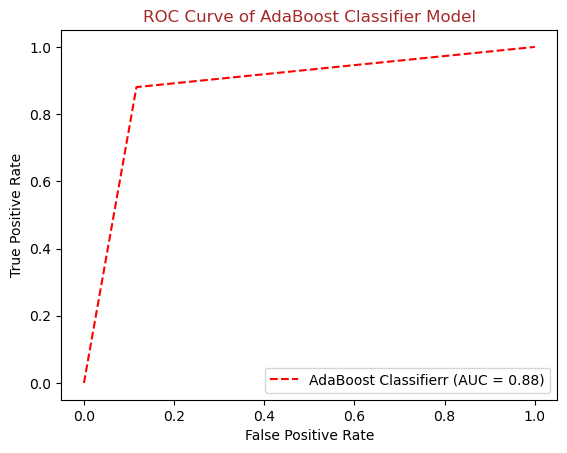

 Here we can area under the curve is --> 0.8819903842837128


In [60]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testABC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="AdaBoost Classifierr") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of AdaBoost Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### RandomForest Classifier 

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 1.0


In [62]:
y_pred_testRFC  = rfc.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testRFC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9520606866348635


In [63]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testRFC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      6390
           1       0.94      0.97      0.95      6397

    accuracy                           0.95     12787
   macro avg       0.95      0.95      0.95     12787
weighted avg       0.95      0.95      0.95     12787



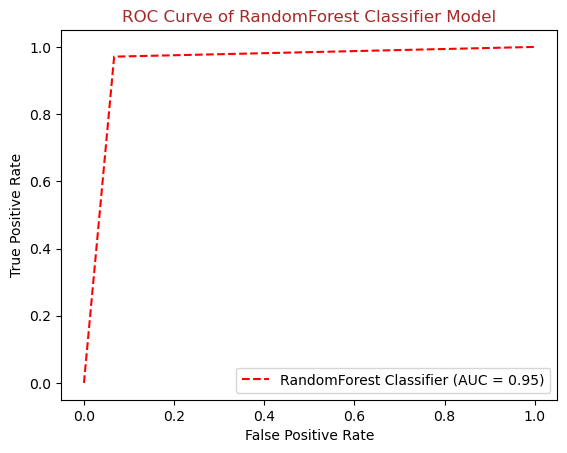

 Here we can area under the curve is --> 0.9520502690644064


In [64]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testRFC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="RandomForest Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of RandomForest Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### Logistic Regression

In [65]:
log_R =LogisticRegression()
log_R.fit(X_train, Y_train)
y_pred = log_R.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8143687599384792


In [66]:
y_pred_testLR  = log_R.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testLR ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8131696254007977


In [67]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testLR))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      6390
           1       0.81      0.82      0.82      6397

    accuracy                           0.81     12787
   macro avg       0.81      0.81      0.81     12787
weighted avg       0.81      0.81      0.81     12787



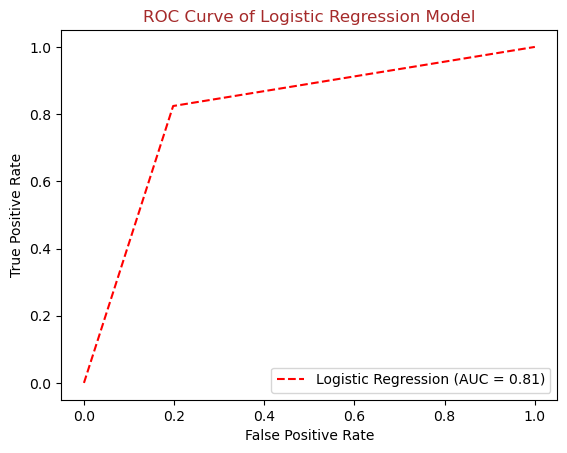

 Here we can area under the curve is --> 0.8131636186074115


In [68]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testLR)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="Logistic Regression") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Logistic Regression Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### SVC

In [110]:
SVM = SVC()
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.8829019055811892


In [111]:
y_pred_testSVM  = SVM.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testSVM ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.8670524751700946


In [112]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testSVM))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      6390
           1       0.84      0.91      0.87      6397

    accuracy                           0.87     12787
   macro avg       0.87      0.87      0.87     12787
weighted avg       0.87      0.87      0.87     12787



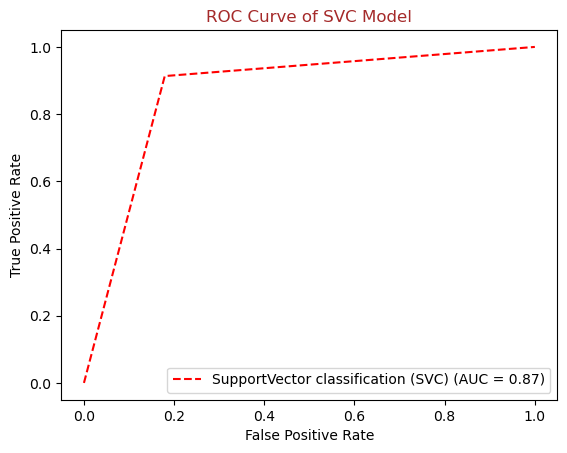

 Here we can area under the curve is --> 0.8670271765202928


In [113]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testSVM)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="SupportVector classification (SVC)") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of SVC Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### GradientBoosting Classifier

In [114]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
y_pred = GBC.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9162430593571597


In [115]:
y_pred_testGBC  = GBC.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testGBC ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9155392195198249


In [116]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testGBC))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      6390
           1       0.90      0.94      0.92      6397

    accuracy                           0.92     12787
   macro avg       0.92      0.92      0.92     12787
weighted avg       0.92      0.92      0.92     12787



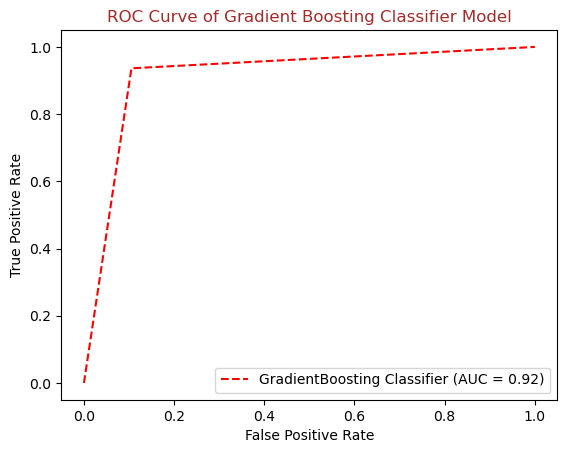

 Here we can area under the curve is --> 0.9155278063391902


In [117]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testGBC)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="GradientBoosting Classifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of Gradient Boosting Classifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

#### KNN

In [118]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_train)
accuracy = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy)

accuracy score of trained data---> 0.9347253721227288


In [119]:
y_pred_testKNN  = KNN.predict(X_test)
accuracy = accuracy_score( Y_test,y_pred_testKNN ) # checking test data 
print('accuracy score oftest data-->',accuracy)

accuracy score oftest data--> 0.9131930867287088


In [120]:
print(  '.                      classification report                        .\n',
      classification_report(Y_test,y_pred_testKNN))


.                      classification report                        .
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      6390
           1       0.86      0.99      0.92      6397

    accuracy                           0.91     12787
   macro avg       0.92      0.91      0.91     12787
weighted avg       0.92      0.91      0.91     12787



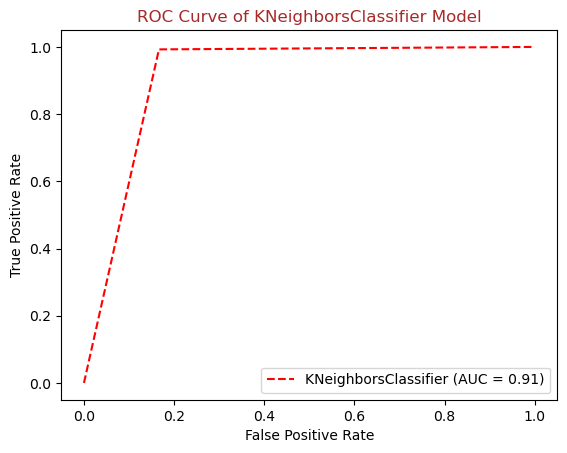

 Here we can area under the curve is --> 0.9131495641907653


In [121]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_testKNN)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr =fpr,tpr =tpr , roc_auc = roc_auc , estimator_name ="KNeighborsClassifier") 
display.plot(color='red', linestyle='--')
plt.title('ROC Curve of KNeighborsClassifier Model', color='brown')
plt.show()
print(' Here we can area under the curve is -->',roc_auc)

we will further understand which model is best predicting by using cross validation 

## Cross Validation

In [122]:
from sklearn.model_selection import cross_val_score

In [87]:
cscore1 = cross_val_score(rfc,x1,y1)
print('Cscore for RandomForest Classifier-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testRFC)-cscore1.mean())

Cscore for RandomForest Classifier->  [0.90860215 0.96226784 0.96480938 0.96539251 0.96245967]
mean of cscore->  0.9527063118706739
difference between accuracy and cross validation score is 0.0009966677179708006


In [123]:
cscore2 = cross_val_score(KNN,x1,y1)
print('Cscore for Kneighbours Classifier ',cscore2)
print('mean of cscore-> ',cscore2.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testKNN)-cscore2.mean())

Cscore for Kneighbours Classifier  [0.91300098 0.91407625 0.91827957 0.91680516 0.91778277]
mean of cscore->  0.915988946000709
difference between accuracy and cross validation score is -0.0027958592720002118


In [124]:
cscore3 = cross_val_score(abc,x1,y1)
print('Cscore for AdaBoost Classifier-> ',cscore3)
print('mean of cscore-> ',cscore3.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testABC)-cscore3.mean())

Cscore for AdaBoost Classifier->  [0.82101662 0.89589443 0.89775171 0.90683351 0.89539544]
mean of cscore->  0.8833783426971044
difference between accuracy and cross validation score is -0.001388822090238051


In [125]:
cscore4 = cross_val_score(GBC,x1,y1)
print('Cscore for Gradient Boost Classifier -> ',cscore4)
print('mean of cscore-> ',cscore4.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testGBC)-cscore4.mean())

Cscore for Gradient Boost Classifier ->  [0.84437928 0.92228739 0.92825024 0.93068726 0.92237755]
mean of cscore->  0.909596345353191
difference between accuracy and cross validation score is 0.00594287416663386


In [126]:
cscore5 = cross_val_score(SVM,x1,y1)
print('Cscore for SUpport Vector Machine-> ',cscore5)
print('mean of cscore-> ',cscore5.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testSVM)-cscore5.mean())

Cscore for SUpport Vector Machine->  [0.86344086 0.87350929 0.8769306  0.88082902 0.87173722]
mean of cscore->  0.8732893952342767
difference between accuracy and cross validation score is -0.006236920064182083


In [127]:
cscore6 = cross_val_score(log_R,x1,y1)
print('Cscore for Logistic Regression',cscore6)
print('mean of cscore-> ',cscore6.mean())
print('difference between accuracy and cross validation score is',accuracy_score(Y_test,y_pred_testLR)-cscore6.mean())

Cscore for Logistic Regression [0.80478983 0.81397849 0.81593353 0.82393196 0.81268941]
mean of cscore->  0.8142646455790932
difference between accuracy and cross validation score is -0.001095020178295436


##### after analysing cross value score we can conclude RandomForest Classifier accuracy is good i.e. 95.29% approx.  with least deviation of only 0.06% so we choose RandomForest Classifier 

## Hyper parameter tuning

In [114]:
rfc.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [115]:
parameters = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }


In [116]:
GSC = GridSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [117]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [118]:
GSC.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [69]:
rfc_final = RandomForestClassifier(criterion= 'entropy',max_depth = None,min_samples_leaf=1,min_samples_split=2,n_estimators = 50)
rfc_final.fit(X_train, Y_train)
y_pred = rfc_final.predict(X_train)
accuracy_score = accuracy_score( Y_train,y_pred ) # checking train data 
print("accuracy score of trained data--->",accuracy_score) 

accuracy score of trained data---> 1.0


In [88]:
y_pred_testRFC = rfc_final.predict(X_test)
accuracy_score = accuracy_score(Y_test, y_pred_testRFC)
print('Accuracy score of test data:', accuracy_score)


Accuracy score of test data: 0.9537029795886447


here we can see that after hyperparameter tuning our model give accuracy score approx similar as before

## Model Saving

In [89]:
import joblib
joblib.dump(rfc_final,'Bank Marketing Prediction ')

['Bank Marketing Prediction ']

# Prediction 

In [90]:
mymodel = joblib.load('Bank Marketing Prediction')
prdt = mymodel.predict(X_test)
prdt

array([1, 0, 1, ..., 1, 1, 1])

## comparing from original 

In [142]:
Orginal = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':Orginal})
data1

,predicted,original
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
12782,0,0
12783,1,1
12784,1,1
12785,1,1


--we can see the prediction based on the model , we can see our model can predict approximately all the values as we can see by comparing to original target values

# Prediction  for  test dataset 

In [39]:
dftest = dftest.drop(['ID'], axis=1)

In [40]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in dftest.columns:
    if dftest[column].dtype == 'object':
        dftest[column] = label_encoder.fit_transform(dftest[column])

In [97]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(dftest), columns = dftest.columns)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.853741,0.804780,-0.274284,-0.299156,-0.13377,-0.361951,0.893753,-0.435798,-0.721325,-0.085149,0.842867,-1.683755,1.771093,-0.381262,-0.355095,0.402014
1,-0.952203,0.500324,1.365252,1.048920,-0.13377,-0.307597,0.893753,-0.435798,1.481647,0.035674,0.842867,2.026859,-0.744933,-0.381262,-0.355095,0.402014
2,1.607819,0.804780,1.365252,-1.647232,-0.13377,1.360708,0.893753,-0.435798,0.380161,-0.326795,0.842867,-1.064950,-0.241728,-0.381262,-0.355095,0.402014
3,0.426271,-1.021957,-1.913820,-0.299156,-0.13377,-2.591066,-1.118878,2.294639,1.481647,-1.535027,-0.159752,-0.638627,-0.744933,-0.381262,-0.355095,0.402014
4,-0.853741,-0.108588,1.365252,1.048920,-0.13377,-1.153947,0.893753,-0.435798,-0.721325,0.760613,-0.159752,1.222048,-0.241728,-0.381262,-0.355095,0.402014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,-0.853741,1.413692,1.365252,-0.299156,-0.13377,-0.338068,0.893753,-0.435798,-0.721325,-1.051734,0.842867,0.060973,-0.744933,-0.381262,-0.355095,0.402014
12226,-0.164504,-0.108588,-0.274284,1.048920,-0.13377,-0.579610,-1.118878,-0.435798,-0.721325,1.485552,-1.496578,-0.357697,0.764683,-0.381262,-0.355095,0.402014
12227,1.312432,-1.021957,-0.274284,-1.647232,-0.13377,0.971602,0.893753,-0.435798,1.481647,0.518966,0.174454,-0.288014,-0.744933,-0.381262,-0.355095,0.402014
12228,-0.558354,0.195868,-0.274284,-1.647232,-0.13377,-0.091328,0.893753,-0.435798,-0.721325,1.606375,-0.493959,-0.444503,-0.744933,-0.381262,-0.355095,0.402014


In [98]:
mymodel = joblib.load('Bank Marketing Prediction')
subscribed = mymodel.predict(X)
subscribed 

array([0, 1, 0, ..., 0, 1, 1])

In [155]:
dftest_p['subscribed'] = subscribed
dftest_p['subscribed'] = dftest_p['subscribed'].replace({0: 'no', 1: 'yes'})
dftest_p = dftest_p.reset_index(drop=True)
dftest_p


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,32,services,married,secondary,no,4.904868,yes,no,cellular,15,may,4.472136,6,-1,0,unknown,no
1,3709,31,self-employed,single,tertiary,no,5.241483,yes,no,unknown,16,may,26.000000,1,-1,0,unknown,yes
2,37422,57,services,single,primary,no,15.573360,yes,no,telephone,13,may,8.062258,2,-1,0,unknown,no
3,12527,45,blue-collar,divorced,secondary,no,-8.900130,no,yes,unknown,3,jul,10.535654,1,-1,0,unknown,no
4,16013,32,management,single,tertiary,no,0.000000,yes,no,cellular,22,jul,21.330729,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,35237,32,technician,single,secondary,no,5.052774,yes,no,cellular,7,may,14.594520,1,-1,0,unknown,yes
12226,23465,39,management,married,tertiary,no,3.556893,no,no,cellular,28,aug,12.165525,4,-1,0,unknown,no
12227,11743,54,blue-collar,married,primary,no,13.163613,yes,no,unknown,20,jun,12.569805,1,-1,0,unknown,no
12228,28292,35,retired,married,primary,no,6.580844,yes,no,cellular,29,jan,11.661904,1,-1,0,unknown,yes


##### Here we predicted for new clients to tell whether they will subscribe for the term deposit